## Imports, as always!

In [20]:
import logging
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt

from corpora_it import *
from my_utils import *
import score_it

In [2]:
bn2wn_mapping_path = '../resources/bn2wn_mapping.txt'
sentences_p = InputSentences('../EuroSense/parsed_ita_stp/sentences_precision.txt')
sentences_c = InputSentences('../EuroSense/parsed_ita_stp/sentences_coverage.txt')
sentences_folder = InputSentences('../EuroSense/parsed_ita_stp/')
test_data_path = "../wordsim353/combined.tab"

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Parsing Corpora

In [3]:
corpora_path = '../EuroSense/eurosense.v1.0.high-precision.xml'
bn2wn_mapping_path = '../resources/bn2wn_mapping.txt'
outfile_path = './EuroSense/parsed_ita_stp/sentences_precision.txt'

parse(corpora_path, bn2wn_mapping_path, outfile_path, "precision")
#1,560,539 sentences

In [ ]:
corpora_path = '../EuroSense/EuroSense/eurosense.v1.0.high-coverage.xml'
bn2wn_mapping_path = '../resources/bn2wn_mapping.txt'
outfile_path = '../EuroSense/parsed_ita_stp/sentenses_coverage.txt'

parse(corpora_path, bn2wn_mapping_path, outfile_path, "coverage")
#1,560,557 sentences

## Training the Model

### Merged Data

In [3]:
embeddings_path = "../resources/ita_embeddings_size{}_win{}_neg{}_lr{}_epo{}.vec".format(100, 6, 20, 0.09, 10)

model = Word2Vec(sentences_folder, workers=5, size=100, window=6, alpha=0.09, negative=20, iter=10)


2019-06-06 06:05:08,217 : INFO : collecting all words and their counts
2019-06-06 06:05:08,231 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-06 06:05:08,393 : INFO : PROGRESS: at sentence #10000, processed 159393 words, keeping 17586 word types
2019-06-06 06:05:08,533 : INFO : PROGRESS: at sentence #20000, processed 317281 words, keeping 24349 word types
2019-06-06 06:05:08,675 : INFO : PROGRESS: at sentence #30000, processed 482687 words, keeping 29560 word types
2019-06-06 06:05:08,801 : INFO : PROGRESS: at sentence #40000, processed 643368 words, keeping 33085 word types
2019-06-06 06:05:08,948 : INFO : PROGRESS: at sentence #50000, processed 797305 words, keeping 36373 word types
2019-06-06 06:05:09,115 : INFO : PROGRESS: at sentence #60000, processed 952973 words, keeping 38959 word types
2019-06-06 06:05:09,297 : INFO : PROGRESS: at sentence #70000, processed 1112594 words, keeping 41658 word types
2019-06-06 06:05:09,508 : INFO : PROGRESS: at

2019-06-06 06:05:20,430 : INFO : PROGRESS: at sentence #720000, processed 11444578 words, keeping 124815 word types
2019-06-06 06:05:20,573 : INFO : PROGRESS: at sentence #730000, processed 11605063 words, keeping 125595 word types
2019-06-06 06:05:20,719 : INFO : PROGRESS: at sentence #740000, processed 11764103 words, keeping 126339 word types
2019-06-06 06:05:20,911 : INFO : PROGRESS: at sentence #750000, processed 11923865 words, keeping 127024 word types
2019-06-06 06:05:21,052 : INFO : PROGRESS: at sentence #760000, processed 12084716 words, keeping 127460 word types
2019-06-06 06:05:21,202 : INFO : PROGRESS: at sentence #770000, processed 12244932 words, keeping 128018 word types
2019-06-06 06:05:21,365 : INFO : PROGRESS: at sentence #780000, processed 12405792 words, keeping 128579 word types
2019-06-06 06:05:21,525 : INFO : PROGRESS: at sentence #790000, processed 12564715 words, keeping 129139 word types
2019-06-06 06:05:21,679 : INFO : PROGRESS: at sentence #800000, processe

2019-06-06 06:05:31,441 : INFO : PROGRESS: at sentence #1430000, processed 22772985 words, keeping 165140 word types
2019-06-06 06:05:31,594 : INFO : PROGRESS: at sentence #1440000, processed 22928034 words, keeping 165897 word types
2019-06-06 06:05:31,736 : INFO : PROGRESS: at sentence #1450000, processed 23083974 words, keeping 166595 word types
2019-06-06 06:05:31,897 : INFO : PROGRESS: at sentence #1460000, processed 23243091 words, keeping 167190 word types
2019-06-06 06:05:32,049 : INFO : PROGRESS: at sentence #1470000, processed 23401460 words, keeping 167718 word types
2019-06-06 06:05:32,211 : INFO : PROGRESS: at sentence #1480000, processed 23558205 words, keeping 168286 word types
2019-06-06 06:05:32,362 : INFO : PROGRESS: at sentence #1490000, processed 23715308 words, keeping 168664 word types
2019-06-06 06:05:32,517 : INFO : PROGRESS: at sentence #1500000, processed 23878712 words, keeping 169170 word types
2019-06-06 06:05:32,685 : INFO : PROGRESS: at sentence #1510000,

2019-06-06 06:05:42,569 : INFO : PROGRESS: at sentence #2140000, processed 34020642 words, keeping 197069 word types
2019-06-06 06:05:42,703 : INFO : PROGRESS: at sentence #2150000, processed 34183291 words, keeping 197255 word types
2019-06-06 06:05:42,849 : INFO : PROGRESS: at sentence #2160000, processed 34341780 words, keeping 197512 word types
2019-06-06 06:05:43,000 : INFO : PROGRESS: at sentence #2170000, processed 34498994 words, keeping 197755 word types
2019-06-06 06:05:43,163 : INFO : PROGRESS: at sentence #2180000, processed 34659065 words, keeping 197991 word types
2019-06-06 06:05:43,329 : INFO : PROGRESS: at sentence #2190000, processed 34814211 words, keeping 198174 word types
2019-06-06 06:05:43,485 : INFO : PROGRESS: at sentence #2200000, processed 34975849 words, keeping 198346 word types
2019-06-06 06:05:43,634 : INFO : PROGRESS: at sentence #2210000, processed 35134778 words, keeping 198508 word types
2019-06-06 06:05:43,763 : INFO : PROGRESS: at sentence #2220000,

2019-06-06 06:06:00,396 : INFO : PROGRESS: at sentence #2850000, processed 45320496 words, keeping 208346 word types
2019-06-06 06:06:00,885 : INFO : PROGRESS: at sentence #2860000, processed 45484558 words, keeping 208496 word types
2019-06-06 06:06:01,282 : INFO : PROGRESS: at sentence #2870000, processed 45650599 words, keeping 208694 word types
2019-06-06 06:06:01,656 : INFO : PROGRESS: at sentence #2880000, processed 45811064 words, keeping 208825 word types
2019-06-06 06:06:02,114 : INFO : PROGRESS: at sentence #2890000, processed 45973342 words, keeping 208967 word types
2019-06-06 06:06:02,492 : INFO : PROGRESS: at sentence #2900000, processed 46132444 words, keeping 209091 word types
2019-06-06 06:06:02,860 : INFO : PROGRESS: at sentence #2910000, processed 46290310 words, keeping 209162 word types
2019-06-06 06:06:03,236 : INFO : PROGRESS: at sentence #2920000, processed 46444519 words, keeping 209257 word types
2019-06-06 06:06:03,592 : INFO : PROGRESS: at sentence #2930000,

2019-06-06 06:07:01,137 : INFO : EPOCH 1 - PROGRESS: at 8.21% examples, 97143 words/s, in_qsize 8, out_qsize 1
2019-06-06 06:07:02,139 : INFO : EPOCH 1 - PROGRESS: at 8.44% examples, 97544 words/s, in_qsize 8, out_qsize 0
2019-06-06 06:07:03,167 : INFO : EPOCH 1 - PROGRESS: at 8.65% examples, 97625 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:07:04,232 : INFO : EPOCH 1 - PROGRESS: at 8.91% examples, 97821 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:07:05,378 : INFO : EPOCH 1 - PROGRESS: at 9.18% examples, 98281 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:07:06,437 : INFO : EPOCH 1 - PROGRESS: at 9.46% examples, 98926 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:07:07,553 : INFO : EPOCH 1 - PROGRESS: at 9.65% examples, 98597 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:07:08,598 : INFO : EPOCH 1 - PROGRESS: at 9.89% examples, 98831 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:07:09,621 : INFO : EPOCH 1 - PROGRESS: at 10.11% examples, 98905 words/s, in_qsize 9, out_qsi

2019-06-06 06:08:19,631 : INFO : EPOCH 1 - PROGRESS: at 25.65% examples, 102187 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:08:20,811 : INFO : EPOCH 1 - PROGRESS: at 25.88% examples, 102051 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:08:21,937 : INFO : EPOCH 1 - PROGRESS: at 26.04% examples, 101728 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:08:22,963 : INFO : EPOCH 1 - PROGRESS: at 26.29% examples, 101803 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:08:23,989 : INFO : EPOCH 1 - PROGRESS: at 26.52% examples, 101799 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:08:25,086 : INFO : EPOCH 1 - PROGRESS: at 26.77% examples, 101815 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:08:26,093 : INFO : EPOCH 1 - PROGRESS: at 26.99% examples, 101833 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:08:27,190 : INFO : EPOCH 1 - PROGRESS: at 27.22% examples, 101853 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:08:28,347 : INFO : EPOCH 1 - PROGRESS: at 27.47% examples, 101898 words/s, in_

2019-06-06 06:09:38,073 : INFO : EPOCH 1 - PROGRESS: at 43.35% examples, 103977 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:09:39,143 : INFO : EPOCH 1 - PROGRESS: at 43.63% examples, 104087 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:09:40,151 : INFO : EPOCH 1 - PROGRESS: at 43.88% examples, 104179 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:09:41,166 : INFO : EPOCH 1 - PROGRESS: at 44.09% examples, 104171 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:09:42,224 : INFO : EPOCH 1 - PROGRESS: at 44.32% examples, 104143 words/s, in_qsize 9, out_qsize 1
2019-06-06 06:09:43,229 : INFO : EPOCH 1 - PROGRESS: at 44.60% examples, 104282 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:09:44,291 : INFO : EPOCH 1 - PROGRESS: at 44.87% examples, 104345 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:09:45,356 : INFO : EPOCH 1 - PROGRESS: at 45.11% examples, 104360 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:09:46,519 : INFO : EPOCH 1 - PROGRESS: at 45.39% examples, 104416 words/s, in_

2019-06-06 06:10:55,980 : INFO : EPOCH 1 - PROGRESS: at 61.57% examples, 105673 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:10:57,002 : INFO : EPOCH 1 - PROGRESS: at 61.79% examples, 105663 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:10:58,113 : INFO : EPOCH 1 - PROGRESS: at 62.02% examples, 105650 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:10:59,309 : INFO : EPOCH 1 - PROGRESS: at 62.22% examples, 105538 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:11:00,331 : INFO : EPOCH 1 - PROGRESS: at 62.46% examples, 105557 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:11:01,408 : INFO : EPOCH 1 - PROGRESS: at 62.70% examples, 105555 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:11:02,497 : INFO : EPOCH 1 - PROGRESS: at 62.97% examples, 105583 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:11:03,551 : INFO : EPOCH 1 - PROGRESS: at 63.21% examples, 105592 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:11:04,634 : INFO : EPOCH 1 - PROGRESS: at 63.47% examples, 105624 words/s, in_q

2019-06-06 06:12:14,556 : INFO : EPOCH 1 - PROGRESS: at 79.85% examples, 106486 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:12:15,681 : INFO : EPOCH 1 - PROGRESS: at 80.09% examples, 106470 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:12:16,705 : INFO : EPOCH 1 - PROGRESS: at 80.33% examples, 106482 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:12:17,804 : INFO : EPOCH 1 - PROGRESS: at 80.58% examples, 106499 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:12:18,985 : INFO : EPOCH 1 - PROGRESS: at 80.84% examples, 106493 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:12:20,108 : INFO : EPOCH 1 - PROGRESS: at 81.09% examples, 106505 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:12:21,138 : INFO : EPOCH 1 - PROGRESS: at 81.32% examples, 106516 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:12:22,148 : INFO : EPOCH 1 - PROGRESS: at 81.56% examples, 106531 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:12:23,198 : INFO : EPOCH 1 - PROGRESS: at 81.82% examples, 106560 words/s, in_q

2019-06-06 06:13:32,862 : INFO : EPOCH 1 - PROGRESS: at 98.05% examples, 107074 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:13:33,911 : INFO : EPOCH 1 - PROGRESS: at 98.28% examples, 107080 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:13:34,969 : INFO : EPOCH 1 - PROGRESS: at 98.46% examples, 107017 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:13:36,168 : INFO : EPOCH 1 - PROGRESS: at 98.75% examples, 107029 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:13:37,219 : INFO : EPOCH 1 - PROGRESS: at 99.01% examples, 107055 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:13:38,234 : INFO : EPOCH 1 - PROGRESS: at 99.25% examples, 107090 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:13:39,322 : INFO : EPOCH 1 - PROGRESS: at 99.44% examples, 107018 words/s, in_qsize 9, out_qsize 1
2019-06-06 06:13:40,636 : INFO : EPOCH 1 - PROGRESS: at 99.73% examples, 107000 words/s, in_qsize 5, out_qsize 4
2019-06-06 06:13:40,973 : INFO : worker thread finished; awaiting finish of 4 more threads
201

2019-06-06 06:14:47,383 : INFO : EPOCH 2 - PROGRESS: at 13.87% examples, 99744 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:14:48,454 : INFO : EPOCH 2 - PROGRESS: at 14.12% examples, 99846 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:14:49,458 : INFO : EPOCH 2 - PROGRESS: at 14.35% examples, 99911 words/s, in_qsize 9, out_qsize 1
2019-06-06 06:14:50,474 : INFO : EPOCH 2 - PROGRESS: at 14.62% examples, 100237 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:14:51,590 : INFO : EPOCH 2 - PROGRESS: at 14.85% examples, 100139 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:14:52,614 : INFO : EPOCH 2 - PROGRESS: at 15.08% examples, 100173 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:14:53,708 : INFO : EPOCH 2 - PROGRESS: at 15.34% examples, 100229 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:14:54,912 : INFO : EPOCH 2 - PROGRESS: at 15.63% examples, 100402 words/s, in_qsize 7, out_qsize 2
2019-06-06 06:14:55,933 : INFO : EPOCH 2 - PROGRESS: at 15.86% examples, 100551 words/s, in_qsize

2019-06-06 06:16:04,806 : INFO : EPOCH 2 - PROGRESS: at 30.93% examples, 101928 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:16:05,897 : INFO : EPOCH 2 - PROGRESS: at 31.14% examples, 101883 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:16:06,987 : INFO : EPOCH 2 - PROGRESS: at 31.37% examples, 101898 words/s, in_qsize 9, out_qsize 1
2019-06-06 06:16:08,002 : INFO : EPOCH 2 - PROGRESS: at 31.58% examples, 101899 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:16:09,038 : INFO : EPOCH 2 - PROGRESS: at 31.81% examples, 101886 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:16:10,252 : INFO : EPOCH 2 - PROGRESS: at 32.07% examples, 101879 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:16:11,336 : INFO : EPOCH 2 - PROGRESS: at 32.33% examples, 101958 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:16:12,371 : INFO : EPOCH 2 - PROGRESS: at 32.56% examples, 101947 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:16:13,541 : INFO : EPOCH 2 - PROGRESS: at 32.84% examples, 102040 words/s, in_q

2019-06-06 06:17:23,328 : INFO : EPOCH 2 - PROGRESS: at 48.33% examples, 102935 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:17:24,384 : INFO : EPOCH 2 - PROGRESS: at 48.55% examples, 102919 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:17:25,463 : INFO : EPOCH 2 - PROGRESS: at 48.80% examples, 102933 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:17:26,482 : INFO : EPOCH 2 - PROGRESS: at 49.01% examples, 102932 words/s, in_qsize 9, out_qsize 1
2019-06-06 06:17:27,558 : INFO : EPOCH 2 - PROGRESS: at 49.22% examples, 102904 words/s, in_qsize 9, out_qsize 1
2019-06-06 06:17:28,565 : INFO : EPOCH 2 - PROGRESS: at 49.49% examples, 102988 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:17:29,566 : INFO : EPOCH 2 - PROGRESS: at 49.71% examples, 102992 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:17:30,574 : INFO : EPOCH 2 - PROGRESS: at 49.90% examples, 102909 words/s, in_qsize 4, out_qsize 5
2019-06-06 06:17:31,603 : INFO : EPOCH 2 - PROGRESS: at 50.21% examples, 103062 words/s, in_q

2019-06-06 06:18:41,264 : INFO : EPOCH 2 - PROGRESS: at 65.69% examples, 103292 words/s, in_qsize 8, out_qsize 1
2019-06-06 06:18:42,300 : INFO : EPOCH 2 - PROGRESS: at 65.95% examples, 103344 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:18:43,327 : INFO : EPOCH 2 - PROGRESS: at 66.16% examples, 103336 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:18:44,360 : INFO : EPOCH 2 - PROGRESS: at 66.44% examples, 103421 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:18:45,391 : INFO : EPOCH 2 - PROGRESS: at 66.70% examples, 103472 words/s, in_qsize 7, out_qsize 0
2019-06-06 06:18:46,478 : INFO : EPOCH 2 - PROGRESS: at 66.95% examples, 103473 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:18:47,534 : INFO : EPOCH 2 - PROGRESS: at 67.19% examples, 103486 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:18:48,650 : INFO : EPOCH 2 - PROGRESS: at 67.43% examples, 103479 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:18:49,716 : INFO : EPOCH 2 - PROGRESS: at 67.70% examples, 103519 words/s, in_q

2019-06-06 06:19:58,549 : INFO : EPOCH 2 - PROGRESS: at 82.92% examples, 103711 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:19:59,624 : INFO : EPOCH 2 - PROGRESS: at 83.18% examples, 103743 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:20:00,788 : INFO : EPOCH 2 - PROGRESS: at 83.41% examples, 103700 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:20:01,920 : INFO : EPOCH 2 - PROGRESS: at 83.63% examples, 103666 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:20:03,042 : INFO : EPOCH 2 - PROGRESS: at 83.89% examples, 103685 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:20:04,185 : INFO : EPOCH 2 - PROGRESS: at 84.14% examples, 103674 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:20:05,297 : INFO : EPOCH 2 - PROGRESS: at 84.40% examples, 103695 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:20:06,315 : INFO : EPOCH 2 - PROGRESS: at 84.64% examples, 103717 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:20:07,357 : INFO : EPOCH 2 - PROGRESS: at 84.85% examples, 103708 words/s, in_q

2019-06-06 06:21:15,437 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-06-06 06:21:15,446 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-06-06 06:21:15,531 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-06-06 06:21:15,607 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-06-06 06:21:15,609 : INFO : EPOCH - 2 : training on 49627924 raw words (47113336 effective words) took 453.7s, 103848 effective words/s
2019-06-06 06:21:17,568 : INFO : EPOCH 3 - PROGRESS: at 0.16% examples, 72313 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:21:18,601 : INFO : EPOCH 3 - PROGRESS: at 0.34% examples, 77571 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:21:19,656 : INFO : EPOCH 3 - PROGRESS: at 0.61% examples, 90816 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:21:20,747 : INFO : EPOCH 3 - PROGRESS: at 0.84% examples, 94182 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:21:21,865 : INFO : EPOCH 3 - PROGRES

2019-06-06 06:22:31,291 : INFO : EPOCH 3 - PROGRESS: at 16.36% examples, 102663 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:22:32,330 : INFO : EPOCH 3 - PROGRESS: at 16.56% examples, 102498 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:22:33,398 : INFO : EPOCH 3 - PROGRESS: at 16.80% examples, 102536 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:22:34,403 : INFO : EPOCH 3 - PROGRESS: at 17.03% examples, 102542 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:22:35,404 : INFO : EPOCH 3 - PROGRESS: at 17.29% examples, 102795 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:22:36,459 : INFO : EPOCH 3 - PROGRESS: at 17.51% examples, 102739 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:22:37,499 : INFO : EPOCH 3 - PROGRESS: at 17.76% examples, 102931 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:22:38,695 : INFO : EPOCH 3 - PROGRESS: at 18.00% examples, 102808 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:22:39,772 : INFO : EPOCH 3 - PROGRESS: at 18.22% examples, 102720 words/s, in

2019-06-06 06:23:49,418 : INFO : EPOCH 3 - PROGRESS: at 33.07% examples, 101858 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:23:50,426 : INFO : EPOCH 3 - PROGRESS: at 33.28% examples, 101871 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:23:51,499 : INFO : EPOCH 3 - PROGRESS: at 33.52% examples, 101901 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:23:52,536 : INFO : EPOCH 3 - PROGRESS: at 33.77% examples, 101953 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:23:53,568 : INFO : EPOCH 3 - PROGRESS: at 34.04% examples, 102068 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:23:54,760 : INFO : EPOCH 3 - PROGRESS: at 34.28% examples, 102020 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:23:55,808 : INFO : EPOCH 3 - PROGRESS: at 34.47% examples, 101945 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:23:56,812 : INFO : EPOCH 3 - PROGRESS: at 34.71% examples, 102017 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:23:57,933 : INFO : EPOCH 3 - PROGRESS: at 34.96% examples, 102075 words/s, in_qs

2019-06-06 06:25:08,854 : INFO : EPOCH 3 - PROGRESS: at 50.03% examples, 101511 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:25:10,009 : INFO : EPOCH 3 - PROGRESS: at 50.27% examples, 101498 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:25:11,084 : INFO : EPOCH 3 - PROGRESS: at 50.51% examples, 101519 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:25:12,103 : INFO : EPOCH 3 - PROGRESS: at 50.77% examples, 101602 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:25:13,135 : INFO : EPOCH 3 - PROGRESS: at 51.00% examples, 101637 words/s, in_qsize 8, out_qsize 1
2019-06-06 06:25:14,322 : INFO : EPOCH 3 - PROGRESS: at 51.24% examples, 101605 words/s, in_qsize 9, out_qsize 1
2019-06-06 06:25:15,320 : INFO : EPOCH 3 - PROGRESS: at 51.54% examples, 101734 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:25:16,353 : INFO : EPOCH 3 - PROGRESS: at 51.76% examples, 101735 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:25:17,353 : INFO : EPOCH 3 - PROGRESS: at 52.01% examples, 101786 words/s, in_q

2019-06-06 06:26:26,966 : INFO : EPOCH 3 - PROGRESS: at 67.17% examples, 101837 words/s, in_qsize 8, out_qsize 1
2019-06-06 06:26:27,970 : INFO : EPOCH 3 - PROGRESS: at 67.40% examples, 101842 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:26:29,064 : INFO : EPOCH 3 - PROGRESS: at 67.59% examples, 101788 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:26:30,156 : INFO : EPOCH 3 - PROGRESS: at 67.85% examples, 101824 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:26:31,218 : INFO : EPOCH 3 - PROGRESS: at 68.05% examples, 101781 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:26:32,245 : INFO : EPOCH 3 - PROGRESS: at 68.30% examples, 101837 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:26:33,248 : INFO : EPOCH 3 - PROGRESS: at 68.51% examples, 101843 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:26:34,316 : INFO : EPOCH 3 - PROGRESS: at 68.73% examples, 101827 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:26:35,353 : INFO : EPOCH 3 - PROGRESS: at 68.97% examples, 101850 words/s, in_

2019-06-06 06:27:46,536 : INFO : EPOCH 3 - PROGRESS: at 84.36% examples, 101872 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:27:47,586 : INFO : EPOCH 3 - PROGRESS: at 84.62% examples, 101914 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:27:48,600 : INFO : EPOCH 3 - PROGRESS: at 84.83% examples, 101917 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:27:49,653 : INFO : EPOCH 3 - PROGRESS: at 85.08% examples, 101959 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:27:50,789 : INFO : EPOCH 3 - PROGRESS: at 85.34% examples, 101976 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:27:51,912 : INFO : EPOCH 3 - PROGRESS: at 85.58% examples, 101973 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:27:53,061 : INFO : EPOCH 3 - PROGRESS: at 85.82% examples, 101964 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:27:54,169 : INFO : EPOCH 3 - PROGRESS: at 86.12% examples, 102039 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:27:55,267 : INFO : EPOCH 3 - PROGRESS: at 86.39% examples, 102068 words/s, in

2019-06-06 06:29:01,479 : INFO : EPOCH 4 - PROGRESS: at 0.48% examples, 73777 words/s, in_qsize 5, out_qsize 5
2019-06-06 06:29:02,679 : INFO : EPOCH 4 - PROGRESS: at 0.86% examples, 95060 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:29:03,907 : INFO : EPOCH 4 - PROGRESS: at 1.11% examples, 96110 words/s, in_qsize 9, out_qsize 1
2019-06-06 06:29:04,906 : INFO : EPOCH 4 - PROGRESS: at 1.40% examples, 101661 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:29:06,023 : INFO : EPOCH 4 - PROGRESS: at 1.63% examples, 100497 words/s, in_qsize 7, out_qsize 2
2019-06-06 06:29:07,059 : INFO : EPOCH 4 - PROGRESS: at 1.94% examples, 104942 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:29:08,138 : INFO : EPOCH 4 - PROGRESS: at 2.16% examples, 103977 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:29:09,249 : INFO : EPOCH 4 - PROGRESS: at 2.42% examples, 104612 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:29:10,456 : INFO : EPOCH 4 - PROGRESS: at 2.69% examples, 104327 words/s, in_qsize 9, out_q

2019-06-06 06:30:21,038 : INFO : EPOCH 4 - PROGRESS: at 17.84% examples, 101303 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:30:22,145 : INFO : EPOCH 4 - PROGRESS: at 18.12% examples, 101537 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:30:23,255 : INFO : EPOCH 4 - PROGRESS: at 18.35% examples, 101542 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:30:24,262 : INFO : EPOCH 4 - PROGRESS: at 18.57% examples, 101558 words/s, in_qsize 7, out_qsize 0
2019-06-06 06:30:25,516 : INFO : EPOCH 4 - PROGRESS: at 18.80% examples, 101393 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:30:26,607 : INFO : EPOCH 4 - PROGRESS: at 19.06% examples, 101529 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:30:27,684 : INFO : EPOCH 4 - PROGRESS: at 19.24% examples, 101261 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:30:28,776 : INFO : EPOCH 4 - PROGRESS: at 19.43% examples, 100983 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:30:29,852 : INFO : EPOCH 4 - PROGRESS: at 19.61% examples, 100727 words/s, in_qsi

2019-06-06 06:31:40,642 : INFO : EPOCH 4 - PROGRESS: at 35.04% examples, 101783 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:31:41,769 : INFO : EPOCH 4 - PROGRESS: at 35.28% examples, 101774 words/s, in_qsize 7, out_qsize 1
2019-06-06 06:31:42,859 : INFO : EPOCH 4 - PROGRESS: at 35.49% examples, 101729 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:31:43,940 : INFO : EPOCH 4 - PROGRESS: at 35.71% examples, 101691 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:31:44,978 : INFO : EPOCH 4 - PROGRESS: at 35.96% examples, 101741 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:31:46,028 : INFO : EPOCH 4 - PROGRESS: at 36.22% examples, 101840 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:31:47,088 : INFO : EPOCH 4 - PROGRESS: at 36.47% examples, 101877 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:31:48,134 : INFO : EPOCH 4 - PROGRESS: at 36.71% examples, 101920 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:31:49,188 : INFO : EPOCH 4 - PROGRESS: at 36.99% examples, 102016 words/s, in_q

2019-06-06 06:32:59,231 : INFO : EPOCH 4 - PROGRESS: at 52.68% examples, 103078 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:33:00,372 : INFO : EPOCH 4 - PROGRESS: at 52.93% examples, 103063 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:33:01,406 : INFO : EPOCH 4 - PROGRESS: at 53.20% examples, 103134 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:33:02,475 : INFO : EPOCH 4 - PROGRESS: at 53.46% examples, 103190 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:33:03,562 : INFO : EPOCH 4 - PROGRESS: at 53.64% examples, 103083 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:33:04,762 : INFO : EPOCH 4 - PROGRESS: at 53.85% examples, 102969 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:33:05,892 : INFO : EPOCH 4 - PROGRESS: at 54.03% examples, 102844 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:33:06,969 : INFO : EPOCH 4 - PROGRESS: at 54.21% examples, 102743 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:33:08,139 : INFO : EPOCH 4 - PROGRESS: at 54.45% examples, 102718 words/s, in_q

2019-06-06 06:34:17,242 : INFO : EPOCH 4 - PROGRESS: at 69.23% examples, 102236 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:34:18,337 : INFO : EPOCH 4 - PROGRESS: at 69.44% examples, 102183 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:34:19,413 : INFO : EPOCH 4 - PROGRESS: at 69.64% examples, 102136 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:34:20,496 : INFO : EPOCH 4 - PROGRESS: at 69.88% examples, 102145 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:34:21,615 : INFO : EPOCH 4 - PROGRESS: at 70.09% examples, 102086 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:34:22,665 : INFO : EPOCH 4 - PROGRESS: at 70.32% examples, 102107 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:34:23,697 : INFO : EPOCH 4 - PROGRESS: at 70.57% examples, 102131 words/s, in_qsize 7, out_qsize 0
2019-06-06 06:34:24,773 : INFO : EPOCH 4 - PROGRESS: at 70.79% examples, 102118 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:34:25,816 : INFO : EPOCH 4 - PROGRESS: at 71.03% examples, 102140 words/s, in_qs

2019-06-06 06:35:35,520 : INFO : EPOCH 4 - PROGRESS: at 85.48% examples, 101412 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:35:36,538 : INFO : EPOCH 4 - PROGRESS: at 85.72% examples, 101437 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:35:37,620 : INFO : EPOCH 4 - PROGRESS: at 86.12% examples, 101639 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:35:38,657 : INFO : EPOCH 4 - PROGRESS: at 86.39% examples, 101684 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:35:39,730 : INFO : EPOCH 4 - PROGRESS: at 86.66% examples, 101720 words/s, in_qsize 8, out_qsize 0
2019-06-06 06:35:40,774 : INFO : EPOCH 4 - PROGRESS: at 86.87% examples, 101693 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:35:41,788 : INFO : EPOCH 4 - PROGRESS: at 87.11% examples, 101720 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:35:43,025 : INFO : EPOCH 4 - PROGRESS: at 87.40% examples, 101738 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:35:44,240 : INFO : EPOCH 4 - PROGRESS: at 87.69% examples, 101785 words/s, in_qsiz

2019-06-06 06:36:50,158 : INFO : EPOCH 5 - PROGRESS: at 1.44% examples, 87698 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:36:51,222 : INFO : EPOCH 5 - PROGRESS: at 1.61% examples, 85726 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:36:52,241 : INFO : EPOCH 5 - PROGRESS: at 1.79% examples, 85482 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:36:53,315 : INFO : EPOCH 5 - PROGRESS: at 2.02% examples, 86702 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:36:54,356 : INFO : EPOCH 5 - PROGRESS: at 2.26% examples, 88585 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:36:55,388 : INFO : EPOCH 5 - PROGRESS: at 2.46% examples, 88806 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:36:56,400 : INFO : EPOCH 5 - PROGRESS: at 2.67% examples, 89143 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:36:57,535 : INFO : EPOCH 5 - PROGRESS: at 2.86% examples, 88094 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:36:58,599 : INFO : EPOCH 5 - PROGRESS: at 3.09% examples, 88762 words/s, in_qsize 9, out_qsize 

2019-06-06 06:38:10,006 : INFO : EPOCH 5 - PROGRESS: at 16.49% examples, 88372 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:38:11,153 : INFO : EPOCH 5 - PROGRESS: at 16.74% examples, 88497 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:38:12,291 : INFO : EPOCH 5 - PROGRESS: at 16.97% examples, 88524 words/s, in_qsize 8, out_qsize 1
2019-06-06 06:38:13,591 : INFO : EPOCH 5 - PROGRESS: at 17.27% examples, 88813 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:38:14,708 : INFO : EPOCH 5 - PROGRESS: at 17.51% examples, 88970 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:38:15,779 : INFO : EPOCH 5 - PROGRESS: at 17.79% examples, 89360 words/s, in_qsize 8, out_qsize 1
2019-06-06 06:38:16,797 : INFO : EPOCH 5 - PROGRESS: at 18.00% examples, 89496 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:38:17,905 : INFO : EPOCH 5 - PROGRESS: at 18.22% examples, 89541 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:38:18,967 : INFO : EPOCH 5 - PROGRESS: at 18.43% examples, 89630 words/s, in_qsize 9, ou

2019-06-06 06:39:31,085 : INFO : EPOCH 5 - PROGRESS: at 31.79% examples, 88794 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:39:32,086 : INFO : EPOCH 5 - PROGRESS: at 32.01% examples, 88880 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:39:33,154 : INFO : EPOCH 5 - PROGRESS: at 32.21% examples, 88876 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:39:34,167 : INFO : EPOCH 5 - PROGRESS: at 32.43% examples, 88957 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:39:35,309 : INFO : EPOCH 5 - PROGRESS: at 32.70% examples, 89083 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:39:36,458 : INFO : EPOCH 5 - PROGRESS: at 32.92% examples, 89095 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:39:37,521 : INFO : EPOCH 5 - PROGRESS: at 33.13% examples, 89096 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:39:38,529 : INFO : EPOCH 5 - PROGRESS: at 33.35% examples, 89179 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:39:39,557 : INFO : EPOCH 5 - PROGRESS: at 33.55% examples, 89198 words/s, in_qsize 10,

2019-06-06 06:40:49,466 : INFO : EPOCH 5 - PROGRESS: at 47.15% examples, 89968 words/s, in_qsize 9, out_qsize 1
2019-06-06 06:40:50,564 : INFO : EPOCH 5 - PROGRESS: at 47.41% examples, 90068 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:40:51,652 : INFO : EPOCH 5 - PROGRESS: at 47.65% examples, 90131 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:40:52,787 : INFO : EPOCH 5 - PROGRESS: at 47.82% examples, 90025 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:40:53,863 : INFO : EPOCH 5 - PROGRESS: at 48.00% examples, 89980 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:40:54,973 : INFO : EPOCH 5 - PROGRESS: at 48.23% examples, 90038 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:40:56,156 : INFO : EPOCH 5 - PROGRESS: at 48.45% examples, 90033 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:40:57,165 : INFO : EPOCH 5 - PROGRESS: at 48.68% examples, 90089 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:40:58,272 : INFO : EPOCH 5 - PROGRESS: at 48.91% examples, 90144 words/s, in_qsize 9, o

2019-06-06 06:42:07,818 : INFO : EPOCH 5 - PROGRESS: at 64.52% examples, 93373 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:42:08,885 : INFO : EPOCH 5 - PROGRESS: at 64.77% examples, 93419 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:42:09,896 : INFO : EPOCH 5 - PROGRESS: at 65.04% examples, 93509 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:42:10,941 : INFO : EPOCH 5 - PROGRESS: at 65.32% examples, 93587 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:42:11,970 : INFO : EPOCH 5 - PROGRESS: at 65.48% examples, 93526 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:42:13,045 : INFO : EPOCH 5 - PROGRESS: at 65.70% examples, 93539 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:42:14,188 : INFO : EPOCH 5 - PROGRESS: at 66.01% examples, 93642 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:42:15,195 : INFO : EPOCH 5 - PROGRESS: at 66.24% examples, 93700 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:42:16,292 : INFO : EPOCH 5 - PROGRESS: at 66.48% examples, 93731 words/s, in_qsize 9

2019-06-06 06:43:26,287 : INFO : EPOCH 5 - PROGRESS: at 81.44% examples, 94998 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:43:27,383 : INFO : EPOCH 5 - PROGRESS: at 81.68% examples, 95020 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:43:28,399 : INFO : EPOCH 5 - PROGRESS: at 81.92% examples, 95061 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:43:29,418 : INFO : EPOCH 5 - PROGRESS: at 82.12% examples, 95055 words/s, in_qsize 9, out_qsize 1
2019-06-06 06:43:30,568 : INFO : EPOCH 5 - PROGRESS: at 82.41% examples, 95111 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:43:31,642 : INFO : EPOCH 5 - PROGRESS: at 82.68% examples, 95162 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:43:32,648 : INFO : EPOCH 5 - PROGRESS: at 82.92% examples, 95207 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:43:33,674 : INFO : EPOCH 5 - PROGRESS: at 83.14% examples, 95224 words/s, in_qsize 8, out_qsize 1
2019-06-06 06:43:34,761 : INFO : EPOCH 5 - PROGRESS: at 83.37% examples, 95226 words/s, in_qsize 9, o

2019-06-06 06:44:43,810 : INFO : EPOCH 5 - PROGRESS: at 98.32% examples, 96233 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:44:44,853 : INFO : EPOCH 5 - PROGRESS: at 98.56% examples, 96263 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:44:45,852 : INFO : EPOCH 5 - PROGRESS: at 98.75% examples, 96241 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:44:46,867 : INFO : EPOCH 5 - PROGRESS: at 98.97% examples, 96255 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:44:47,909 : INFO : EPOCH 5 - PROGRESS: at 99.16% examples, 96245 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:44:49,001 : INFO : EPOCH 5 - PROGRESS: at 99.42% examples, 96282 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:44:50,068 : INFO : EPOCH 5 - PROGRESS: at 99.65% examples, 96285 words/s, in_qsize 8, out_qsize 0
2019-06-06 06:44:51,115 : INFO : EPOCH 5 - PROGRESS: at 99.92% examples, 96332 words/s, in_qsize 4, out_qsize 1
2019-06-06 06:44:51,118 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-06-06 

2019-06-06 06:45:57,901 : INFO : EPOCH 6 - PROGRESS: at 13.79% examples, 98335 words/s, in_qsize 9, out_qsize 1
2019-06-06 06:45:59,033 : INFO : EPOCH 6 - PROGRESS: at 14.02% examples, 98230 words/s, in_qsize 8, out_qsize 1
2019-06-06 06:46:00,040 : INFO : EPOCH 6 - PROGRESS: at 14.23% examples, 98172 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:46:01,160 : INFO : EPOCH 6 - PROGRESS: at 14.47% examples, 98233 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:46:02,238 : INFO : EPOCH 6 - PROGRESS: at 14.77% examples, 98626 words/s, in_qsize 8, out_qsize 1
2019-06-06 06:46:03,364 : INFO : EPOCH 6 - PROGRESS: at 14.99% examples, 98539 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:46:04,481 : INFO : EPOCH 6 - PROGRESS: at 15.27% examples, 98725 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:46:05,535 : INFO : EPOCH 6 - PROGRESS: at 15.52% examples, 98853 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:46:06,574 : INFO : EPOCH 6 - PROGRESS: at 15.70% examples, 98632 words/s, in_qsize 9, ou

2019-06-06 06:47:16,689 : INFO : EPOCH 6 - PROGRESS: at 31.18% examples, 101429 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:47:17,850 : INFO : EPOCH 6 - PROGRESS: at 31.43% examples, 101462 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:47:18,922 : INFO : EPOCH 6 - PROGRESS: at 31.66% examples, 101491 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:47:19,946 : INFO : EPOCH 6 - PROGRESS: at 31.91% examples, 101552 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:47:20,979 : INFO : EPOCH 6 - PROGRESS: at 32.15% examples, 101606 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:47:22,045 : INFO : EPOCH 6 - PROGRESS: at 32.39% examples, 101639 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:47:23,054 : INFO : EPOCH 6 - PROGRESS: at 32.62% examples, 101650 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:47:24,171 : INFO : EPOCH 6 - PROGRESS: at 32.84% examples, 101591 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:47:25,316 : INFO : EPOCH 6 - PROGRESS: at 33.05% examples, 101452 words/s, in_q

2019-06-06 06:48:35,764 : INFO : EPOCH 6 - PROGRESS: at 47.21% examples, 99420 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:48:36,845 : INFO : EPOCH 6 - PROGRESS: at 47.40% examples, 99321 words/s, in_qsize 7, out_qsize 2
2019-06-06 06:48:37,937 : INFO : EPOCH 6 - PROGRESS: at 47.68% examples, 99430 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:48:39,078 : INFO : EPOCH 6 - PROGRESS: at 47.92% examples, 99431 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:48:40,125 : INFO : EPOCH 6 - PROGRESS: at 48.17% examples, 99518 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:48:41,162 : INFO : EPOCH 6 - PROGRESS: at 48.39% examples, 99527 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:48:42,284 : INFO : EPOCH 6 - PROGRESS: at 48.61% examples, 99499 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:48:43,301 : INFO : EPOCH 6 - PROGRESS: at 48.80% examples, 99431 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:48:44,706 : INFO : EPOCH 6 - PROGRESS: at 48.97% examples, 99198 words/s, in_qsize 3, 

2019-06-06 06:49:54,899 : INFO : EPOCH 6 - PROGRESS: at 63.03% examples, 98021 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:49:55,927 : INFO : EPOCH 6 - PROGRESS: at 63.25% examples, 98034 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:49:56,980 : INFO : EPOCH 6 - PROGRESS: at 63.45% examples, 98007 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:49:58,464 : INFO : EPOCH 6 - PROGRESS: at 63.68% examples, 97873 words/s, in_qsize 5, out_qsize 4
2019-06-06 06:49:59,572 : INFO : EPOCH 6 - PROGRESS: at 64.00% examples, 97983 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:50:00,726 : INFO : EPOCH 6 - PROGRESS: at 64.22% examples, 97956 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:50:01,808 : INFO : EPOCH 6 - PROGRESS: at 64.39% examples, 97860 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:50:02,876 : INFO : EPOCH 6 - PROGRESS: at 64.60% examples, 97830 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:50:03,977 : INFO : EPOCH 6 - PROGRESS: at 64.79% examples, 97761 words/s, in_qsize 1

2019-06-06 06:51:13,689 : INFO : EPOCH 6 - PROGRESS: at 80.03% examples, 98707 words/s, in_qsize 9, out_qsize 3
2019-06-06 06:51:14,721 : INFO : EPOCH 6 - PROGRESS: at 80.33% examples, 98812 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:51:15,733 : INFO : EPOCH 6 - PROGRESS: at 80.52% examples, 98798 words/s, in_qsize 8, out_qsize 1
2019-06-06 06:51:16,960 : INFO : EPOCH 6 - PROGRESS: at 80.70% examples, 98705 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:51:17,967 : INFO : EPOCH 6 - PROGRESS: at 80.86% examples, 98645 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:51:18,990 : INFO : EPOCH 6 - PROGRESS: at 80.94% examples, 98482 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:51:20,058 : INFO : EPOCH 6 - PROGRESS: at 81.06% examples, 98358 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:51:21,061 : INFO : EPOCH 6 - PROGRESS: at 81.19% examples, 98276 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:51:22,121 : INFO : EPOCH 6 - PROGRESS: at 81.30% examples, 98154 words/s, in_qsize 9, o

2019-06-06 06:52:32,241 : INFO : EPOCH 6 - PROGRESS: at 95.69% examples, 97951 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:52:33,248 : INFO : EPOCH 6 - PROGRESS: at 95.92% examples, 97963 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:52:34,327 : INFO : EPOCH 6 - PROGRESS: at 96.16% examples, 97981 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:52:35,400 : INFO : EPOCH 6 - PROGRESS: at 96.41% examples, 98001 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:52:36,578 : INFO : EPOCH 6 - PROGRESS: at 96.69% examples, 98039 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:52:37,580 : INFO : EPOCH 6 - PROGRESS: at 96.92% examples, 98052 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:52:38,630 : INFO : EPOCH 6 - PROGRESS: at 97.14% examples, 98055 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:52:39,712 : INFO : EPOCH 6 - PROGRESS: at 97.39% examples, 98072 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:52:40,779 : INFO : EPOCH 6 - PROGRESS: at 97.64% examples, 98112 words/s, in_qsize 9, 

2019-06-06 06:53:45,890 : INFO : EPOCH 7 - PROGRESS: at 12.69% examples, 109412 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:53:47,027 : INFO : EPOCH 7 - PROGRESS: at 12.97% examples, 109547 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:53:48,109 : INFO : EPOCH 7 - PROGRESS: at 13.21% examples, 109466 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:53:49,237 : INFO : EPOCH 7 - PROGRESS: at 13.43% examples, 109139 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:53:50,250 : INFO : EPOCH 7 - PROGRESS: at 13.71% examples, 109354 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:53:51,356 : INFO : EPOCH 7 - PROGRESS: at 13.96% examples, 109236 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:53:52,382 : INFO : EPOCH 7 - PROGRESS: at 14.21% examples, 109266 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:53:53,404 : INFO : EPOCH 7 - PROGRESS: at 14.45% examples, 109307 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:53:54,458 : INFO : EPOCH 7 - PROGRESS: at 14.70% examples, 109293 words/s, in_q

2019-06-06 06:55:03,543 : INFO : EPOCH 7 - PROGRESS: at 29.10% examples, 103472 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:55:04,549 : INFO : EPOCH 7 - PROGRESS: at 29.35% examples, 103547 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:55:05,715 : INFO : EPOCH 7 - PROGRESS: at 29.59% examples, 103496 words/s, in_qsize 10, out_qsize 1
2019-06-06 06:55:06,903 : INFO : EPOCH 7 - PROGRESS: at 29.82% examples, 103430 words/s, in_qsize 8, out_qsize 2
2019-06-06 06:55:07,944 : INFO : EPOCH 7 - PROGRESS: at 30.10% examples, 103611 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:55:09,145 : INFO : EPOCH 7 - PROGRESS: at 30.32% examples, 103466 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:55:10,298 : INFO : EPOCH 7 - PROGRESS: at 30.59% examples, 103558 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:55:11,331 : INFO : EPOCH 7 - PROGRESS: at 30.83% examples, 103610 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:55:12,338 : INFO : EPOCH 7 - PROGRESS: at 31.02% examples, 103544 words/s, in_q

2019-06-06 06:56:21,618 : INFO : EPOCH 7 - PROGRESS: at 45.87% examples, 102818 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:56:22,660 : INFO : EPOCH 7 - PROGRESS: at 46.14% examples, 102894 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:56:23,730 : INFO : EPOCH 7 - PROGRESS: at 46.36% examples, 102868 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:56:24,750 : INFO : EPOCH 7 - PROGRESS: at 46.55% examples, 102777 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:56:25,789 : INFO : EPOCH 7 - PROGRESS: at 46.74% examples, 102722 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:56:26,815 : INFO : EPOCH 7 - PROGRESS: at 46.97% examples, 102717 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:56:27,975 : INFO : EPOCH 7 - PROGRESS: at 47.19% examples, 102648 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:56:29,183 : INFO : EPOCH 7 - PROGRESS: at 47.38% examples, 102470 words/s, in_qsize 6, out_qsize 4
2019-06-06 06:56:30,373 : INFO : EPOCH 7 - PROGRESS: at 47.63% examples, 102479 words/s, in_q

2019-06-06 06:57:40,960 : INFO : EPOCH 7 - PROGRESS: at 62.04% examples, 100916 words/s, in_qsize 10, out_qsize 2
2019-06-06 06:57:42,026 : INFO : EPOCH 7 - PROGRESS: at 62.32% examples, 101004 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:57:43,159 : INFO : EPOCH 7 - PROGRESS: at 62.52% examples, 100936 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:57:44,240 : INFO : EPOCH 7 - PROGRESS: at 62.74% examples, 100917 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:57:45,306 : INFO : EPOCH 7 - PROGRESS: at 62.97% examples, 100904 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:57:46,313 : INFO : EPOCH 7 - PROGRESS: at 63.17% examples, 100881 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:57:47,326 : INFO : EPOCH 7 - PROGRESS: at 63.35% examples, 100826 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:57:48,325 : INFO : EPOCH 7 - PROGRESS: at 63.59% examples, 100869 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:57:49,507 : INFO : EPOCH 7 - PROGRESS: at 63.83% examples, 100819 words/s, in_

2019-06-06 06:59:00,293 : INFO : EPOCH 7 - PROGRESS: at 78.66% examples, 100337 words/s, in_qsize 8, out_qsize 1
2019-06-06 06:59:01,321 : INFO : EPOCH 7 - PROGRESS: at 78.92% examples, 100392 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:59:02,471 : INFO : EPOCH 7 - PROGRESS: at 79.19% examples, 100440 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:59:03,548 : INFO : EPOCH 7 - PROGRESS: at 79.44% examples, 100455 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:59:04,640 : INFO : EPOCH 7 - PROGRESS: at 79.72% examples, 100518 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:59:05,673 : INFO : EPOCH 7 - PROGRESS: at 79.93% examples, 100520 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:59:06,686 : INFO : EPOCH 7 - PROGRESS: at 80.15% examples, 100527 words/s, in_qsize 10, out_qsize 0
2019-06-06 06:59:07,864 : INFO : EPOCH 7 - PROGRESS: at 80.40% examples, 100539 words/s, in_qsize 9, out_qsize 0
2019-06-06 06:59:08,960 : INFO : EPOCH 7 - PROGRESS: at 80.64% examples, 100548 words/s, in_

2019-06-06 07:00:17,908 : INFO : EPOCH 7 - PROGRESS: at 95.92% examples, 101184 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:00:18,911 : INFO : EPOCH 7 - PROGRESS: at 96.14% examples, 101191 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:00:20,005 : INFO : EPOCH 7 - PROGRESS: at 96.39% examples, 101198 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:00:21,011 : INFO : EPOCH 7 - PROGRESS: at 96.63% examples, 101226 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:00:22,094 : INFO : EPOCH 7 - PROGRESS: at 96.87% examples, 101235 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:00:23,176 : INFO : EPOCH 7 - PROGRESS: at 97.12% examples, 101245 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:00:24,254 : INFO : EPOCH 7 - PROGRESS: at 97.38% examples, 101277 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:00:25,350 : INFO : EPOCH 7 - PROGRESS: at 97.61% examples, 101262 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:00:26,438 : INFO : EPOCH 7 - PROGRESS: at 97.75% examples, 101166 words/s, in_q

2019-06-06 07:01:33,961 : INFO : EPOCH 8 - PROGRESS: at 10.44% examples, 89258 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:01:34,982 : INFO : EPOCH 8 - PROGRESS: at 10.66% examples, 89495 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:01:36,143 : INFO : EPOCH 8 - PROGRESS: at 10.87% examples, 89337 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:01:37,167 : INFO : EPOCH 8 - PROGRESS: at 11.05% examples, 89233 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:01:38,186 : INFO : EPOCH 8 - PROGRESS: at 11.28% examples, 89456 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:01:39,306 : INFO : EPOCH 8 - PROGRESS: at 11.49% examples, 89370 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:01:40,378 : INFO : EPOCH 8 - PROGRESS: at 11.72% examples, 89511 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:01:41,413 : INFO : EPOCH 8 - PROGRESS: at 11.91% examples, 89550 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:01:42,564 : INFO : EPOCH 8 - PROGRESS: at 12.12% examples, 89572 words/s, in_qsize 9,

2019-06-06 07:02:52,360 : INFO : EPOCH 8 - PROGRESS: at 25.19% examples, 88766 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:02:53,363 : INFO : EPOCH 8 - PROGRESS: at 25.44% examples, 88951 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:02:54,377 : INFO : EPOCH 8 - PROGRESS: at 25.65% examples, 89058 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:02:55,401 : INFO : EPOCH 8 - PROGRESS: at 25.86% examples, 89084 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:02:56,432 : INFO : EPOCH 8 - PROGRESS: at 26.12% examples, 89311 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:02:57,442 : INFO : EPOCH 8 - PROGRESS: at 26.27% examples, 89137 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:02:58,573 : INFO : EPOCH 8 - PROGRESS: at 26.45% examples, 89027 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:02:59,730 : INFO : EPOCH 8 - PROGRESS: at 26.66% examples, 88967 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:03:00,775 : INFO : EPOCH 8 - PROGRESS: at 26.83% examples, 88847 words/s, in_qsize 9,

2019-06-06 07:04:10,847 : INFO : EPOCH 8 - PROGRESS: at 41.50% examples, 92232 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:04:11,927 : INFO : EPOCH 8 - PROGRESS: at 41.73% examples, 92299 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:04:13,121 : INFO : EPOCH 8 - PROGRESS: at 41.98% examples, 92358 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:04:14,124 : INFO : EPOCH 8 - PROGRESS: at 42.16% examples, 92325 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:04:15,179 : INFO : EPOCH 8 - PROGRESS: at 42.32% examples, 92225 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:04:16,227 : INFO : EPOCH 8 - PROGRESS: at 42.55% examples, 92306 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:04:17,308 : INFO : EPOCH 8 - PROGRESS: at 42.77% examples, 92327 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:04:18,399 : INFO : EPOCH 8 - PROGRESS: at 43.00% examples, 92344 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:04:19,468 : INFO : EPOCH 8 - PROGRESS: at 43.26% examples, 92459 words/s, in_qsize 9, o

2019-06-06 07:05:29,177 : INFO : EPOCH 8 - PROGRESS: at 57.23% examples, 92799 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:05:30,207 : INFO : EPOCH 8 - PROGRESS: at 57.40% examples, 92765 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:05:31,264 : INFO : EPOCH 8 - PROGRESS: at 57.62% examples, 92785 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:05:32,328 : INFO : EPOCH 8 - PROGRESS: at 57.86% examples, 92839 words/s, in_qsize 4, out_qsize 0
2019-06-06 07:05:33,419 : INFO : EPOCH 8 - PROGRESS: at 58.08% examples, 92850 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:05:34,453 : INFO : EPOCH 8 - PROGRESS: at 58.29% examples, 92878 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:05:35,638 : INFO : EPOCH 8 - PROGRESS: at 58.54% examples, 92922 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:05:36,655 : INFO : EPOCH 8 - PROGRESS: at 58.79% examples, 92983 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:05:37,686 : INFO : EPOCH 8 - PROGRESS: at 59.03% examples, 93040 words/s, in_qsize 9, o

2019-06-06 07:06:47,470 : INFO : EPOCH 8 - PROGRESS: at 74.02% examples, 94538 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:06:48,654 : INFO : EPOCH 8 - PROGRESS: at 74.22% examples, 94490 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:06:49,654 : INFO : EPOCH 8 - PROGRESS: at 74.41% examples, 94489 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:06:50,660 : INFO : EPOCH 8 - PROGRESS: at 74.60% examples, 94462 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:06:51,717 : INFO : EPOCH 8 - PROGRESS: at 74.82% examples, 94474 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:06:52,776 : INFO : EPOCH 8 - PROGRESS: at 75.03% examples, 94486 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:06:53,783 : INFO : EPOCH 8 - PROGRESS: at 75.21% examples, 94460 words/s, in_qsize 8, out_qsize 1
2019-06-06 07:06:54,859 : INFO : EPOCH 8 - PROGRESS: at 75.44% examples, 94468 words/s, in_qsize 7, out_qsize 2
2019-06-06 07:06:55,963 : INFO : EPOCH 8 - PROGRESS: at 75.74% examples, 94570 words/s, in_qsize 9, ou

2019-06-06 07:08:06,199 : INFO : EPOCH 8 - PROGRESS: at 89.97% examples, 94722 words/s, in_qsize 10, out_qsize 2
2019-06-06 07:08:07,251 : INFO : EPOCH 8 - PROGRESS: at 90.26% examples, 94797 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:08:08,318 : INFO : EPOCH 8 - PROGRESS: at 90.48% examples, 94803 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:08:09,458 : INFO : EPOCH 8 - PROGRESS: at 90.69% examples, 94775 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:08:10,483 : INFO : EPOCH 8 - PROGRESS: at 90.89% examples, 94770 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:08:11,486 : INFO : EPOCH 8 - PROGRESS: at 91.06% examples, 94750 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:08:12,505 : INFO : EPOCH 8 - PROGRESS: at 91.28% examples, 94768 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:08:13,545 : INFO : EPOCH 8 - PROGRESS: at 91.48% examples, 94760 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:08:14,741 : INFO : EPOCH 8 - PROGRESS: at 91.71% examples, 94761 words/s, in_qsize 10, o

2019-06-06 07:09:20,310 : INFO : EPOCH 9 - PROGRESS: at 5.93% examples, 100195 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:09:21,471 : INFO : EPOCH 9 - PROGRESS: at 6.17% examples, 100101 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:09:22,485 : INFO : EPOCH 9 - PROGRESS: at 6.42% examples, 100505 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:09:23,569 : INFO : EPOCH 9 - PROGRESS: at 6.64% examples, 100363 words/s, in_qsize 8, out_qsize 0
2019-06-06 07:09:25,042 : INFO : EPOCH 9 - PROGRESS: at 6.88% examples, 99293 words/s, in_qsize 7, out_qsize 4
2019-06-06 07:09:26,120 : INFO : EPOCH 9 - PROGRESS: at 7.21% examples, 100668 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:09:27,144 : INFO : EPOCH 9 - PROGRESS: at 7.42% examples, 100716 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:09:28,211 : INFO : EPOCH 9 - PROGRESS: at 7.67% examples, 101162 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:09:29,234 : INFO : EPOCH 9 - PROGRESS: at 7.87% examples, 100927 words/s, in_qsize 9, out

2019-06-06 07:10:39,048 : INFO : EPOCH 9 - PROGRESS: at 22.73% examples, 100478 words/s, in_qsize 9, out_qsize 1
2019-06-06 07:10:40,052 : INFO : EPOCH 9 - PROGRESS: at 22.96% examples, 100513 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:10:41,113 : INFO : EPOCH 9 - PROGRESS: at 23.18% examples, 100493 words/s, in_qsize 6, out_qsize 0
2019-06-06 07:10:42,116 : INFO : EPOCH 9 - PROGRESS: at 23.38% examples, 100438 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:10:43,154 : INFO : EPOCH 9 - PROGRESS: at 23.60% examples, 100441 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:10:44,199 : INFO : EPOCH 9 - PROGRESS: at 23.80% examples, 100350 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:10:45,299 : INFO : EPOCH 9 - PROGRESS: at 24.04% examples, 100377 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:10:46,311 : INFO : EPOCH 9 - PROGRESS: at 24.26% examples, 100396 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:10:47,387 : INFO : EPOCH 9 - PROGRESS: at 24.52% examples, 100518 words/s, in_q

2019-06-06 07:11:56,887 : INFO : EPOCH 9 - PROGRESS: at 39.23% examples, 100331 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:11:58,063 : INFO : EPOCH 9 - PROGRESS: at 39.44% examples, 100262 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:11:59,114 : INFO : EPOCH 9 - PROGRESS: at 39.67% examples, 100257 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:12:00,222 : INFO : EPOCH 9 - PROGRESS: at 39.89% examples, 100221 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:12:01,236 : INFO : EPOCH 9 - PROGRESS: at 40.12% examples, 100235 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:12:02,277 : INFO : EPOCH 9 - PROGRESS: at 40.35% examples, 100235 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:12:03,353 : INFO : EPOCH 9 - PROGRESS: at 40.59% examples, 100268 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:12:04,411 : INFO : EPOCH 9 - PROGRESS: at 40.82% examples, 100261 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:12:05,416 : INFO : EPOCH 9 - PROGRESS: at 41.03% examples, 100279 words/s, in_

2019-06-06 07:13:14,442 : INFO : EPOCH 9 - PROGRESS: at 55.50% examples, 99869 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:13:15,449 : INFO : EPOCH 9 - PROGRESS: at 55.71% examples, 99848 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:13:16,579 : INFO : EPOCH 9 - PROGRESS: at 55.91% examples, 99762 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:13:17,607 : INFO : EPOCH 9 - PROGRESS: at 56.13% examples, 99769 words/s, in_qsize 8, out_qsize 1
2019-06-06 07:13:18,652 : INFO : EPOCH 9 - PROGRESS: at 56.40% examples, 99840 words/s, in_qsize 8, out_qsize 0
2019-06-06 07:13:19,698 : INFO : EPOCH 9 - PROGRESS: at 56.60% examples, 99805 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:13:20,710 : INFO : EPOCH 9 - PROGRESS: at 56.82% examples, 99818 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:13:21,779 : INFO : EPOCH 9 - PROGRESS: at 57.09% examples, 99882 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:13:22,844 : INFO : EPOCH 9 - PROGRESS: at 57.28% examples, 99841 words/s, in_qsize 9, out

2019-06-06 07:14:32,492 : INFO : EPOCH 9 - PROGRESS: at 71.89% examples, 99600 words/s, in_qsize 9, out_qsize 1
2019-06-06 07:14:33,598 : INFO : EPOCH 9 - PROGRESS: at 72.11% examples, 99584 words/s, in_qsize 8, out_qsize 1
2019-06-06 07:14:34,673 : INFO : EPOCH 9 - PROGRESS: at 72.29% examples, 99521 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:14:35,745 : INFO : EPOCH 9 - PROGRESS: at 72.47% examples, 99459 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:14:36,756 : INFO : EPOCH 9 - PROGRESS: at 72.71% examples, 99497 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:14:37,837 : INFO : EPOCH 9 - PROGRESS: at 72.91% examples, 99461 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:14:38,940 : INFO : EPOCH 9 - PROGRESS: at 73.13% examples, 99446 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:14:39,987 : INFO : EPOCH 9 - PROGRESS: at 73.35% examples, 99447 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:14:41,101 : INFO : EPOCH 9 - PROGRESS: at 73.52% examples, 99347 words/s, in_qsize 9, ou

2019-06-06 07:15:51,190 : INFO : EPOCH 9 - PROGRESS: at 87.77% examples, 98783 words/s, in_qsize 8, out_qsize 1
2019-06-06 07:15:52,197 : INFO : EPOCH 9 - PROGRESS: at 87.97% examples, 98771 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:15:53,261 : INFO : EPOCH 9 - PROGRESS: at 88.13% examples, 98717 words/s, in_qsize 8, out_qsize 3
2019-06-06 07:15:54,290 : INFO : EPOCH 9 - PROGRESS: at 88.33% examples, 98687 words/s, in_qsize 9, out_qsize 1
2019-06-06 07:15:55,303 : INFO : EPOCH 9 - PROGRESS: at 88.55% examples, 98698 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:15:56,311 : INFO : EPOCH 9 - PROGRESS: at 88.74% examples, 98665 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:15:57,326 : INFO : EPOCH 9 - PROGRESS: at 88.94% examples, 98653 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:15:58,364 : INFO : EPOCH 9 - PROGRESS: at 89.14% examples, 98636 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:15:59,432 : INFO : EPOCH 9 - PROGRESS: at 89.36% examples, 98635 words/s, in_qsize 10, 

2019-06-06 07:17:05,191 : INFO : EPOCH 10 - PROGRESS: at 2.28% examples, 88471 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:17:06,197 : INFO : EPOCH 10 - PROGRESS: at 2.52% examples, 90326 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:17:07,367 : INFO : EPOCH 10 - PROGRESS: at 2.77% examples, 90890 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:17:08,370 : INFO : EPOCH 10 - PROGRESS: at 3.00% examples, 91752 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:17:09,507 : INFO : EPOCH 10 - PROGRESS: at 3.25% examples, 92367 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:17:10,536 : INFO : EPOCH 10 - PROGRESS: at 3.49% examples, 93469 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:17:11,592 : INFO : EPOCH 10 - PROGRESS: at 3.69% examples, 93293 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:17:12,851 : INFO : EPOCH 10 - PROGRESS: at 3.93% examples, 93127 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:17:13,868 : INFO : EPOCH 10 - PROGRESS: at 4.15% examples, 93606 words/s, in_qsize 9,

2019-06-06 07:18:24,330 : INFO : EPOCH 10 - PROGRESS: at 19.02% examples, 97977 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:18:25,438 : INFO : EPOCH 10 - PROGRESS: at 19.23% examples, 97829 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:18:26,475 : INFO : EPOCH 10 - PROGRESS: at 19.43% examples, 97760 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:18:27,481 : INFO : EPOCH 10 - PROGRESS: at 19.65% examples, 97822 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:18:28,630 : INFO : EPOCH 10 - PROGRESS: at 19.85% examples, 97638 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:18:29,694 : INFO : EPOCH 10 - PROGRESS: at 20.04% examples, 97447 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:18:30,723 : INFO : EPOCH 10 - PROGRESS: at 20.24% examples, 97391 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:18:31,803 : INFO : EPOCH 10 - PROGRESS: at 20.40% examples, 97098 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:18:32,814 : INFO : EPOCH 10 - PROGRESS: at 20.56% examples, 96875 words/s, in_q

2019-06-06 07:19:42,665 : INFO : EPOCH 10 - PROGRESS: at 34.45% examples, 95718 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:19:43,700 : INFO : EPOCH 10 - PROGRESS: at 34.68% examples, 95749 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:19:44,830 : INFO : EPOCH 10 - PROGRESS: at 34.86% examples, 95674 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:19:45,873 : INFO : EPOCH 10 - PROGRESS: at 35.08% examples, 95701 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:19:46,912 : INFO : EPOCH 10 - PROGRESS: at 35.32% examples, 95779 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:19:47,938 : INFO : EPOCH 10 - PROGRESS: at 35.58% examples, 95917 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:19:48,962 : INFO : EPOCH 10 - PROGRESS: at 35.82% examples, 96005 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:19:50,178 : INFO : EPOCH 10 - PROGRESS: at 36.08% examples, 96043 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:19:51,181 : INFO : EPOCH 10 - PROGRESS: at 36.22% examples, 95875 words/s, in_qs

2019-06-06 07:21:00,968 : INFO : EPOCH 10 - PROGRESS: at 50.15% examples, 95388 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:21:01,972 : INFO : EPOCH 10 - PROGRESS: at 50.35% examples, 95385 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:21:03,047 : INFO : EPOCH 10 - PROGRESS: at 50.55% examples, 95355 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:21:04,134 : INFO : EPOCH 10 - PROGRESS: at 50.78% examples, 95395 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:21:05,142 : INFO : EPOCH 10 - PROGRESS: at 50.98% examples, 95387 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:21:06,189 : INFO : EPOCH 10 - PROGRESS: at 51.20% examples, 95402 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:21:07,287 : INFO : EPOCH 10 - PROGRESS: at 51.41% examples, 95363 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:21:08,386 : INFO : EPOCH 10 - PROGRESS: at 51.64% examples, 95362 words/s, in_qsize 8, out_qsize 1
2019-06-06 07:21:09,444 : INFO : EPOCH 10 - PROGRESS: at 51.86% examples, 95376 words/s, in

2019-06-06 07:22:19,341 : INFO : EPOCH 10 - PROGRESS: at 66.28% examples, 95644 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:22:20,377 : INFO : EPOCH 10 - PROGRESS: at 66.50% examples, 95658 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:22:21,604 : INFO : EPOCH 10 - PROGRESS: at 66.75% examples, 95645 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:22:22,623 : INFO : EPOCH 10 - PROGRESS: at 66.99% examples, 95691 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:22:23,637 : INFO : EPOCH 10 - PROGRESS: at 67.21% examples, 95711 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:22:24,705 : INFO : EPOCH 10 - PROGRESS: at 67.45% examples, 95745 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:22:25,731 : INFO : EPOCH 10 - PROGRESS: at 67.68% examples, 95762 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:22:26,827 : INFO : EPOCH 10 - PROGRESS: at 67.91% examples, 95786 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:22:27,957 : INFO : EPOCH 10 - PROGRESS: at 68.16% examples, 95829 words/s, in_q

2019-06-06 07:23:37,256 : INFO : EPOCH 10 - PROGRESS: at 83.69% examples, 97539 words/s, in_qsize 9, out_qsize 1
2019-06-06 07:23:38,360 : INFO : EPOCH 10 - PROGRESS: at 84.10% examples, 97742 words/s, in_qsize 8, out_qsize 2
2019-06-06 07:23:39,401 : INFO : EPOCH 10 - PROGRESS: at 84.47% examples, 97936 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:23:40,438 : INFO : EPOCH 10 - PROGRESS: at 84.86% examples, 98153 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:23:41,525 : INFO : EPOCH 10 - PROGRESS: at 85.26% examples, 98354 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:23:42,591 : INFO : EPOCH 10 - PROGRESS: at 85.66% examples, 98561 words/s, in_qsize 8, out_qsize 0
2019-06-06 07:23:43,621 : INFO : EPOCH 10 - PROGRESS: at 86.03% examples, 98730 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:23:44,689 : INFO : EPOCH 10 - PROGRESS: at 86.43% examples, 98936 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:23:45,749 : INFO : EPOCH 10 - PROGRESS: at 86.85% examples, 99143 words/s, in_q

In [4]:
save_embeddings(embeddings_path, model.wv)
corr, p, data = score_it.spearman(test_data_path, embeddings_path, bn2wn_mapping_path)


2019-06-06 07:24:29,134 : INFO : loading projection weights from ../resources/ita_embeddings_size100_win6_neg20_lr0.09_epo10.vec
2019-06-06 07:24:29,137 : WARNING : this function is deprecated, use smart_open.open instead
2019-06-06 07:24:38,292 : INFO : loaded (34967, 100) matrix from ../resources/ita_embeddings_size100_win6_neg20_lr0.09_epo10.vec
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [13]:
print(corr)
print(len(model.wv.vocab))

0.17436966517177743
98255


In [6]:
data

[['love', 'sex', '6.77', 0.31707254],
 ['tiger', 'cat', '7.35', 0.42046824],
 ['tiger', 'tiger', '10.00', 0.9999999],
 ['book', 'paper', '7.46', 0.3532274],
 ['computer', 'keyboard', '7.62', 0.0],
 ['computer', 'internet', '7.58', 0.547773],
 ['plane', 'car', '5.77', 0.62867016],
 ['train', 'car', '6.31', 0.73887116],
 ['telephone', 'communication', '7.50', 0.18552814],
 ['television', 'radio', '6.77', 0.67359895],
 ['media', 'radio', '7.42', 0.0],
 ['drug', 'abuse', '6.85', 0.37476996],
 ['bread', 'butter', '6.19', 0.49977204],
 ['cucumber', 'potato', '5.92', 0.5149471],
 ['doctor', 'nurse', '7.00', 0.7737671],
 ['professor', 'doctor', '6.62', 0.6317605],
 ['student', 'professor', '6.81', 0.690903],
 ['smart', 'student', '4.62', 0.20862731],
 ['smart', 'stupid', '5.81', 0.4425469],
 ['company', 'stock', '7.08', 0.32091326],
 ['stock', 'market', '8.08', 0.39064485],
 ['stock', 'phone', '1.62', 0.36292696],
 ['stock', 'CD', '1.31', 0.23048355],
 ['stock', 'jaguar', '0.92', 0.0],
 ['stoc

In [11]:
model.wv.vocab

{'ebbene': <gensim.models.keyedvectors.Vocab at 0x1e1bdb775c0>,
 'credere_bn:00083369v': <gensim.models.keyedvectors.Vocab at 0x1e1c805da20>,
 'estremamente_bn:00115271r': <gensim.models.keyedvectors.Vocab at 0x1e1c8600e80>,
 'importante_bn:00104681a': <gensim.models.keyedvectors.Vocab at 0x1e1c8600e10>,
 'ridurre_bn:00086418v': <gensim.models.keyedvectors.Vocab at 0x1e1c8600c88>,
 'zona_bn:00005513n': <gensim.models.keyedvectors.Vocab at 0x1e1c8063b00>,
 'grigio_bn:00103765a': <gensim.models.keyedvectors.Vocab at 0x1e1c80639b0>,
 'accentuare_bn:00082195v': <gensim.models.keyedvectors.Vocab at 0x1e1c80639e8>,
 'momento_bn:00055597n': <gensim.models.keyedvectors.Vocab at 0x1e1c8063a20>,
 'collaborazione_bn:00022452n': <gensim.models.keyedvectors.Vocab at 0x1e1c8063208>,
 'infine_bn:00114417r': <gensim.models.keyedvectors.Vocab at 0x1e1c80631d0>,
 'signore_bn:00035925n': <gensim.models.keyedvectors.Vocab at 0x1e1c80632b0>,
 'presidente_bn:00064234n': <gensim.models.keyedvectors.Vocab at 

In [14]:
senses_only_model = KeyedVectors.load_word2vec_format(embeddings_path, binary=False)

2019-06-06 07:37:14,168 : INFO : loading projection weights from ../resources/ita_embeddings_size100_win6_neg20_lr0.09_epo10.vec
2019-06-06 07:37:14,170 : WARNING : this function is deprecated, use smart_open.open instead
2019-06-06 07:37:21,359 : INFO : loaded (34967, 100) matrix from ../resources/ita_embeddings_size100_win6_neg20_lr0.09_epo10.vec


In [15]:
print(len(senses_only_model.vocab))

34967


### Precision Data

In [16]:
embeddings_path = "../resources/ita_embeddings_prec_size{}_win{}_neg{}_lr{}_epo{}.vec".format(100, 6, 20, 0.09, 10)
model = Word2Vec(sentences_p, workers=5, size=100, window=6, alpha=0.09, negative=20, iter=10)

save_embeddings(embeddings_path, model.wv)
corr, p, data = score_it.spearman(test_data_path, embeddings_path, bn2wn_mapping_path)

2019-06-06 07:40:38,520 : INFO : collecting all words and their counts
2019-06-06 07:40:38,522 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-06 07:40:38,639 : INFO : PROGRESS: at sentence #10000, processed 158965 words, keeping 25762 word types
2019-06-06 07:40:38,756 : INFO : PROGRESS: at sentence #20000, processed 316215 words, keeping 37098 word types
2019-06-06 07:40:38,885 : INFO : PROGRESS: at sentence #30000, processed 481167 words, keeping 46327 word types
2019-06-06 07:40:39,003 : INFO : PROGRESS: at sentence #40000, processed 641379 words, keeping 52703 word types
2019-06-06 07:40:39,128 : INFO : PROGRESS: at sentence #50000, processed 794709 words, keeping 58543 word types
2019-06-06 07:40:39,244 : INFO : PROGRESS: at sentence #60000, processed 949900 words, keeping 63393 word types
2019-06-06 07:40:39,376 : INFO : PROGRESS: at sentence #70000, processed 1108931 words, keeping 68071 word types
2019-06-06 07:40:39,506 : INFO : PROGRESS: at

2019-06-06 07:41:00,356 : INFO : PROGRESS: at sentence #1410000, processed 22378366 words, keeping 254559 word types
2019-06-06 07:41:00,474 : INFO : PROGRESS: at sentence #1420000, processed 22535333 words, keeping 255195 word types
2019-06-06 07:41:00,587 : INFO : PROGRESS: at sentence #1430000, processed 22687403 words, keeping 255875 word types
2019-06-06 07:41:00,698 : INFO : PROGRESS: at sentence #1440000, processed 22841596 words, keeping 256705 word types
2019-06-06 07:41:00,827 : INFO : PROGRESS: at sentence #1450000, processed 22996585 words, keeping 257406 word types
2019-06-06 07:41:00,942 : INFO : PROGRESS: at sentence #1460000, processed 23154917 words, keeping 258074 word types
2019-06-06 07:41:01,060 : INFO : PROGRESS: at sentence #1470000, processed 23312909 words, keeping 258869 word types
2019-06-06 07:41:01,174 : INFO : PROGRESS: at sentence #1480000, processed 23469173 words, keeping 259711 word types
2019-06-06 07:41:01,295 : INFO : PROGRESS: at sentence #1490000,

2019-06-06 07:41:56,930 : INFO : EPOCH 1 - PROGRESS: at 36.61% examples, 168087 words/s, in_qsize 8, out_qsize 1
2019-06-06 07:41:57,983 : INFO : EPOCH 1 - PROGRESS: at 37.50% examples, 168864 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:41:59,027 : INFO : EPOCH 1 - PROGRESS: at 38.39% examples, 169461 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:42:00,070 : INFO : EPOCH 1 - PROGRESS: at 39.29% examples, 170046 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:42:01,085 : INFO : EPOCH 1 - PROGRESS: at 40.18% examples, 170700 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:42:02,109 : INFO : EPOCH 1 - PROGRESS: at 41.07% examples, 171313 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:42:03,138 : INFO : EPOCH 1 - PROGRESS: at 41.74% examples, 171060 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:42:04,155 : INFO : EPOCH 1 - PROGRESS: at 42.59% examples, 171504 words/s, in_qsize 9, out_qsize 1
2019-06-06 07:42:05,169 : INFO : EPOCH 1 - PROGRESS: at 43.39% examples, 171774 words/s, in_qsi

2019-06-06 07:43:10,620 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-06-06 07:43:10,664 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-06-06 07:43:10,685 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-06-06 07:43:10,695 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-06-06 07:43:10,697 : INFO : EPOCH - 1 : training on 24745772 raw words (23508523 effective words) took 124.8s, 188410 effective words/s
2019-06-06 07:43:11,785 : INFO : EPOCH 2 - PROGRESS: at 0.88% examples, 194358 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:43:12,806 : INFO : EPOCH 2 - PROGRESS: at 1.88% examples, 212526 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:43:13,858 : INFO : EPOCH 2 - PROGRESS: at 2.94% examples, 219765 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:43:14,913 : INFO : EPOCH 2 - PROGRESS: at 3.97% examples, 221260 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:43:15,918 : INFO : EPOCH 2 - PR

2019-06-06 07:44:23,443 : INFO : EPOCH 2 - PROGRESS: at 50.98% examples, 164579 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:44:24,453 : INFO : EPOCH 2 - PROGRESS: at 51.62% examples, 164395 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:44:25,453 : INFO : EPOCH 2 - PROGRESS: at 52.23% examples, 164098 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:44:26,490 : INFO : EPOCH 2 - PROGRESS: at 52.90% examples, 163851 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:44:27,536 : INFO : EPOCH 2 - PROGRESS: at 53.77% examples, 164215 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:44:28,563 : INFO : EPOCH 2 - PROGRESS: at 54.52% examples, 164371 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:44:29,597 : INFO : EPOCH 2 - PROGRESS: at 55.23% examples, 164381 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:44:30,641 : INFO : EPOCH 2 - PROGRESS: at 55.92% examples, 164255 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:44:31,714 : INFO : EPOCH 2 - PROGRESS: at 56.60% examples, 163953 words/s, in_q

2019-06-06 07:45:34,182 : INFO : EPOCH 3 - PROGRESS: at 1.45% examples, 168488 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:45:35,210 : INFO : EPOCH 3 - PROGRESS: at 2.19% examples, 171022 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:45:36,224 : INFO : EPOCH 3 - PROGRESS: at 3.02% examples, 174463 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:45:37,228 : INFO : EPOCH 3 - PROGRESS: at 3.88% examples, 179376 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:45:38,302 : INFO : EPOCH 3 - PROGRESS: at 4.69% examples, 179106 words/s, in_qsize 9, out_qsize 1
2019-06-06 07:45:39,322 : INFO : EPOCH 3 - PROGRESS: at 5.56% examples, 181349 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:45:40,365 : INFO : EPOCH 3 - PROGRESS: at 6.48% examples, 183816 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:45:41,484 : INFO : EPOCH 3 - PROGRESS: at 7.36% examples, 184238 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:45:42,531 : INFO : EPOCH 3 - PROGRESS: at 8.01% examples, 180287 words/s, in_qsize 10, o

2019-06-06 07:46:51,744 : INFO : EPOCH 3 - PROGRESS: at 43.03% examples, 126806 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:46:52,915 : INFO : EPOCH 3 - PROGRESS: at 43.55% examples, 126494 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:46:53,951 : INFO : EPOCH 3 - PROGRESS: at 43.99% examples, 126170 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:46:55,071 : INFO : EPOCH 3 - PROGRESS: at 44.56% examples, 126069 words/s, in_qsize 10, out_qsize 1
2019-06-06 07:46:56,083 : INFO : EPOCH 3 - PROGRESS: at 45.23% examples, 126477 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:46:57,112 : INFO : EPOCH 3 - PROGRESS: at 45.77% examples, 126403 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:46:58,237 : INFO : EPOCH 3 - PROGRESS: at 46.28% examples, 126189 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:46:59,278 : INFO : EPOCH 3 - PROGRESS: at 46.76% examples, 125990 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:47:00,312 : INFO : EPOCH 3 - PROGRESS: at 47.37% examples, 126128 words/s, i

2019-06-06 07:48:09,336 : INFO : EPOCH 3 - PROGRESS: at 84.63% examples, 126668 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:48:10,353 : INFO : EPOCH 3 - PROGRESS: at 85.22% examples, 126756 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:48:11,475 : INFO : EPOCH 3 - PROGRESS: at 85.91% examples, 126876 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:48:12,482 : INFO : EPOCH 3 - PROGRESS: at 86.32% examples, 126675 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:48:13,504 : INFO : EPOCH 3 - PROGRESS: at 86.95% examples, 126758 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:48:14,545 : INFO : EPOCH 3 - PROGRESS: at 87.30% examples, 126470 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:48:15,671 : INFO : EPOCH 3 - PROGRESS: at 87.80% examples, 126354 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:48:16,676 : INFO : EPOCH 3 - PROGRESS: at 88.23% examples, 126218 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:48:17,755 : INFO : EPOCH 3 - PROGRESS: at 88.88% examples, 126313 words/s, in_q

2019-06-06 07:49:23,493 : INFO : EPOCH 4 - PROGRESS: at 19.45% examples, 104864 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:49:24,552 : INFO : EPOCH 4 - PROGRESS: at 19.92% examples, 104937 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:49:25,601 : INFO : EPOCH 4 - PROGRESS: at 20.40% examples, 105016 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:49:26,687 : INFO : EPOCH 4 - PROGRESS: at 20.92% examples, 105220 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:49:27,693 : INFO : EPOCH 4 - PROGRESS: at 21.41% examples, 105408 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:49:28,756 : INFO : EPOCH 4 - PROGRESS: at 21.83% examples, 105050 words/s, in_qsize 8, out_qsize 2
2019-06-06 07:49:29,952 : INFO : EPOCH 4 - PROGRESS: at 22.32% examples, 104831 words/s, in_qsize 6, out_qsize 3
2019-06-06 07:49:31,119 : INFO : EPOCH 4 - PROGRESS: at 22.95% examples, 105235 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:49:32,153 : INFO : EPOCH 4 - PROGRESS: at 23.44% examples, 105340 words/s, in_qsi

2019-06-06 07:50:42,328 : INFO : EPOCH 4 - PROGRESS: at 51.54% examples, 98871 words/s, in_qsize 5, out_qsize 0
2019-06-06 07:50:43,331 : INFO : EPOCH 4 - PROGRESS: at 51.86% examples, 98681 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:50:44,379 : INFO : EPOCH 4 - PROGRESS: at 52.28% examples, 98609 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:50:45,513 : INFO : EPOCH 4 - PROGRESS: at 52.90% examples, 98854 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:50:46,513 : INFO : EPOCH 4 - PROGRESS: at 53.40% examples, 98971 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:50:47,520 : INFO : EPOCH 4 - PROGRESS: at 53.81% examples, 98936 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:50:48,689 : INFO : EPOCH 4 - PROGRESS: at 54.32% examples, 98999 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:50:49,739 : INFO : EPOCH 4 - PROGRESS: at 54.76% examples, 99004 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:50:50,769 : INFO : EPOCH 4 - PROGRESS: at 55.07% examples, 98805 words/s, in_qsize 9, o

2019-06-06 07:52:01,558 : INFO : EPOCH 4 - PROGRESS: at 83.84% examples, 97787 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:52:02,588 : INFO : EPOCH 4 - PROGRESS: at 84.19% examples, 97709 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:52:03,652 : INFO : EPOCH 4 - PROGRESS: at 84.63% examples, 97709 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:52:04,659 : INFO : EPOCH 4 - PROGRESS: at 84.98% examples, 97649 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:52:05,718 : INFO : EPOCH 4 - PROGRESS: at 85.42% examples, 97655 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:52:06,794 : INFO : EPOCH 4 - PROGRESS: at 85.83% examples, 97606 words/s, in_qsize 9, out_qsize 1
2019-06-06 07:52:07,809 : INFO : EPOCH 4 - PROGRESS: at 86.32% examples, 97681 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:52:08,867 : INFO : EPOCH 4 - PROGRESS: at 86.70% examples, 97596 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:52:09,968 : INFO : EPOCH 4 - PROGRESS: at 87.18% examples, 97628 words/s, in_qsize 10,

2019-06-06 07:53:16,622 : INFO : EPOCH 5 - PROGRESS: at 13.45% examples, 97374 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:53:17,706 : INFO : EPOCH 5 - PROGRESS: at 13.77% examples, 96488 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:53:18,866 : INFO : EPOCH 5 - PROGRESS: at 14.26% examples, 96566 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:53:19,884 : INFO : EPOCH 5 - PROGRESS: at 14.66% examples, 96477 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:53:21,368 : INFO : EPOCH 5 - PROGRESS: at 14.97% examples, 94662 words/s, in_qsize 4, out_qsize 6
2019-06-06 07:53:22,388 : INFO : EPOCH 5 - PROGRESS: at 15.60% examples, 96120 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:53:23,437 : INFO : EPOCH 5 - PROGRESS: at 16.04% examples, 96216 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:53:24,510 : INFO : EPOCH 5 - PROGRESS: at 16.51% examples, 96481 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:53:25,648 : INFO : EPOCH 5 - PROGRESS: at 16.85% examples, 95889 words/s, in_qsize 10, o

2019-06-06 07:54:36,184 : INFO : EPOCH 5 - PROGRESS: at 46.73% examples, 98104 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:54:37,244 : INFO : EPOCH 5 - PROGRESS: at 47.21% examples, 98191 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:54:38,406 : INFO : EPOCH 5 - PROGRESS: at 47.65% examples, 98106 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:54:39,465 : INFO : EPOCH 5 - PROGRESS: at 48.17% examples, 98274 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:54:40,468 : INFO : EPOCH 5 - PROGRESS: at 48.65% examples, 98400 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:54:41,477 : INFO : EPOCH 5 - PROGRESS: at 49.13% examples, 98520 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:54:42,482 : INFO : EPOCH 5 - PROGRESS: at 49.62% examples, 98646 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:54:43,607 : INFO : EPOCH 5 - PROGRESS: at 50.09% examples, 98672 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:54:44,661 : INFO : EPOCH 5 - PROGRESS: at 50.58% examples, 98755 words/s, in_qsize 10, o

2019-06-06 07:55:54,594 : INFO : EPOCH 5 - PROGRESS: at 82.63% examples, 102135 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:55:55,695 : INFO : EPOCH 5 - PROGRESS: at 83.06% examples, 102092 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:55:56,716 : INFO : EPOCH 5 - PROGRESS: at 83.57% examples, 102188 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:55:57,725 : INFO : EPOCH 5 - PROGRESS: at 83.99% examples, 102193 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:55:58,766 : INFO : EPOCH 5 - PROGRESS: at 84.47% examples, 102231 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:55:59,781 : INFO : EPOCH 5 - PROGRESS: at 84.95% examples, 102286 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:56:00,786 : INFO : EPOCH 5 - PROGRESS: at 85.39% examples, 102296 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:56:01,843 : INFO : EPOCH 5 - PROGRESS: at 85.83% examples, 102277 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:56:02,962 : INFO : EPOCH 5 - PROGRESS: at 86.36% examples, 102325 words/s, in_qsi

2019-06-06 07:57:07,675 : INFO : EPOCH 6 - PROGRESS: at 16.04% examples, 103839 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:57:08,693 : INFO : EPOCH 6 - PROGRESS: at 16.55% examples, 104307 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:57:09,916 : INFO : EPOCH 6 - PROGRESS: at 17.06% examples, 104209 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:57:10,919 : INFO : EPOCH 6 - PROGRESS: at 17.54% examples, 104422 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:57:11,945 : INFO : EPOCH 6 - PROGRESS: at 18.04% examples, 104569 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:57:13,015 : INFO : EPOCH 6 - PROGRESS: at 18.50% examples, 104618 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:57:14,043 : INFO : EPOCH 6 - PROGRESS: at 18.95% examples, 104554 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:57:15,063 : INFO : EPOCH 6 - PROGRESS: at 19.37% examples, 104514 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:57:16,214 : INFO : EPOCH 6 - PROGRESS: at 19.88% examples, 104587 words/s, in_q

2019-06-06 07:58:26,392 : INFO : EPOCH 6 - PROGRESS: at 51.62% examples, 105524 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:58:27,458 : INFO : EPOCH 6 - PROGRESS: at 52.10% examples, 105536 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:58:28,518 : INFO : EPOCH 6 - PROGRESS: at 52.48% examples, 105306 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:58:29,598 : INFO : EPOCH 6 - PROGRESS: at 52.98% examples, 105304 words/s, in_qsize 8, out_qsize 2
2019-06-06 07:58:30,646 : INFO : EPOCH 6 - PROGRESS: at 53.40% examples, 105175 words/s, in_qsize 7, out_qsize 2
2019-06-06 07:58:31,667 : INFO : EPOCH 6 - PROGRESS: at 53.77% examples, 104996 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:58:32,685 : INFO : EPOCH 6 - PROGRESS: at 54.20% examples, 104978 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:58:34,142 : INFO : EPOCH 6 - PROGRESS: at 54.56% examples, 104429 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:58:35,161 : INFO : EPOCH 6 - PROGRESS: at 54.95% examples, 104332 words/s, in_qsi

2019-06-06 07:59:44,578 : INFO : EPOCH 6 - PROGRESS: at 83.18% examples, 101303 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:59:45,708 : INFO : EPOCH 6 - PROGRESS: at 83.60% examples, 101250 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:59:46,766 : INFO : EPOCH 6 - PROGRESS: at 84.03% examples, 101232 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:59:47,836 : INFO : EPOCH 6 - PROGRESS: at 84.51% examples, 101262 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:59:48,877 : INFO : EPOCH 6 - PROGRESS: at 84.91% examples, 101209 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:59:49,937 : INFO : EPOCH 6 - PROGRESS: at 85.39% examples, 101243 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:59:50,990 : INFO : EPOCH 6 - PROGRESS: at 85.79% examples, 101185 words/s, in_qsize 9, out_qsize 0
2019-06-06 07:59:52,016 : INFO : EPOCH 6 - PROGRESS: at 86.19% examples, 101142 words/s, in_qsize 10, out_qsize 0
2019-06-06 07:59:53,147 : INFO : EPOCH 6 - PROGRESS: at 86.65% examples, 101094 words/s, in_qs

2019-06-06 08:00:58,438 : INFO : EPOCH 7 - PROGRESS: at 13.57% examples, 98093 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:00:59,563 : INFO : EPOCH 7 - PROGRESS: at 14.02% examples, 97931 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:01:00,689 : INFO : EPOCH 7 - PROGRESS: at 14.46% examples, 97776 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:01:01,713 : INFO : EPOCH 7 - PROGRESS: at 14.89% examples, 97902 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:01:03,365 : INFO : EPOCH 7 - PROGRESS: at 15.17% examples, 95341 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:01:04,468 : INFO : EPOCH 7 - PROGRESS: at 15.64% examples, 95574 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:01:05,576 : INFO : EPOCH 7 - PROGRESS: at 16.12% examples, 95783 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:01:06,579 : INFO : EPOCH 7 - PROGRESS: at 16.58% examples, 96219 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:01:07,613 : INFO : EPOCH 7 - PROGRESS: at 16.98% examples, 96104 words/s, in_qsize 10,

2019-06-06 08:02:16,952 : INFO : EPOCH 7 - PROGRESS: at 44.91% examples, 95118 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:02:18,013 : INFO : EPOCH 7 - PROGRESS: at 45.39% examples, 95237 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:02:19,629 : INFO : EPOCH 7 - PROGRESS: at 45.89% examples, 94887 words/s, in_qsize 6, out_qsize 4
2019-06-06 08:02:20,669 : INFO : EPOCH 7 - PROGRESS: at 46.48% examples, 95273 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:02:21,736 : INFO : EPOCH 7 - PROGRESS: at 46.98% examples, 95379 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:02:22,785 : INFO : EPOCH 7 - PROGRESS: at 47.41% examples, 95416 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:02:23,835 : INFO : EPOCH 7 - PROGRESS: at 47.90% examples, 95533 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:02:24,898 : INFO : EPOCH 7 - PROGRESS: at 48.33% examples, 95554 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:02:25,923 : INFO : EPOCH 7 - PROGRESS: at 48.73% examples, 95523 words/s, in_qsize 9, o

2019-06-06 08:03:36,534 : INFO : EPOCH 7 - PROGRESS: at 76.57% examples, 94545 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:03:38,051 : INFO : EPOCH 7 - PROGRESS: at 76.97% examples, 94297 words/s, in_qsize 10, out_qsize 6
2019-06-06 08:03:39,095 : INFO : EPOCH 7 - PROGRESS: at 77.58% examples, 94524 words/s, in_qsize 8, out_qsize 0
2019-06-06 08:03:40,142 : INFO : EPOCH 7 - PROGRESS: at 78.07% examples, 94604 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:03:41,182 : INFO : EPOCH 7 - PROGRESS: at 78.51% examples, 94640 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:03:42,288 : INFO : EPOCH 7 - PROGRESS: at 78.93% examples, 94639 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:03:43,439 : INFO : EPOCH 7 - PROGRESS: at 79.39% examples, 94618 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:03:44,565 : INFO : EPOCH 7 - PROGRESS: at 79.80% examples, 94560 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:03:45,724 : INFO : EPOCH 7 - PROGRESS: at 80.25% examples, 94533 words/s, in_qsize 10

2019-06-06 08:04:50,362 : INFO : EPOCH 8 - PROGRESS: at 7.84% examples, 101310 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:04:51,447 : INFO : EPOCH 8 - PROGRESS: at 8.29% examples, 101049 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:04:52,527 : INFO : EPOCH 8 - PROGRESS: at 8.78% examples, 101304 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:04:53,566 : INFO : EPOCH 8 - PROGRESS: at 9.23% examples, 101266 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:04:54,589 : INFO : EPOCH 8 - PROGRESS: at 9.71% examples, 101718 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:04:55,610 : INFO : EPOCH 8 - PROGRESS: at 10.16% examples, 101737 words/s, in_qsize 5, out_qsize 0
2019-06-06 08:04:56,621 : INFO : EPOCH 8 - PROGRESS: at 10.56% examples, 101422 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:04:57,888 : INFO : EPOCH 8 - PROGRESS: at 11.08% examples, 101233 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:04:58,911 : INFO : EPOCH 8 - PROGRESS: at 11.61% examples, 101815 words/s, in_qsize 9,

2019-06-06 08:06:09,641 : INFO : EPOCH 8 - PROGRESS: at 41.19% examples, 99158 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:06:10,664 : INFO : EPOCH 8 - PROGRESS: at 41.59% examples, 99096 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:06:11,724 : INFO : EPOCH 8 - PROGRESS: at 42.03% examples, 99090 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:06:12,743 : INFO : EPOCH 8 - PROGRESS: at 42.47% examples, 99129 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:06:13,917 : INFO : EPOCH 8 - PROGRESS: at 42.91% examples, 99013 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:06:15,043 : INFO : EPOCH 8 - PROGRESS: at 43.36% examples, 98944 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:06:16,184 : INFO : EPOCH 8 - PROGRESS: at 43.84% examples, 98954 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:06:17,323 : INFO : EPOCH 8 - PROGRESS: at 44.32% examples, 98969 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:06:18,375 : INFO : EPOCH 8 - PROGRESS: at 44.87% examples, 99244 words/s, in_qsize 9, 

2019-06-06 08:07:28,032 : INFO : EPOCH 8 - PROGRESS: at 73.84% examples, 98740 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:07:29,042 : INFO : EPOCH 8 - PROGRESS: at 74.29% examples, 98767 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:07:30,138 : INFO : EPOCH 8 - PROGRESS: at 74.75% examples, 98747 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:07:31,255 : INFO : EPOCH 8 - PROGRESS: at 75.17% examples, 98716 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:07:32,344 : INFO : EPOCH 8 - PROGRESS: at 75.61% examples, 98699 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:07:33,455 : INFO : EPOCH 8 - PROGRESS: at 76.01% examples, 98617 words/s, in_qsize 8, out_qsize 1
2019-06-06 08:07:34,476 : INFO : EPOCH 8 - PROGRESS: at 76.53% examples, 98742 words/s, in_qsize 7, out_qsize 0
2019-06-06 08:07:35,660 : INFO : EPOCH 8 - PROGRESS: at 76.85% examples, 98518 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:07:36,728 : INFO : EPOCH 8 - PROGRESS: at 77.30% examples, 98522 words/s, in_qsize 9, o

2019-06-06 08:08:43,213 : INFO : EPOCH 9 - PROGRESS: at 4.41% examples, 94059 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:08:44,307 : INFO : EPOCH 9 - PROGRESS: at 4.90% examples, 94932 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:08:45,341 : INFO : EPOCH 9 - PROGRESS: at 5.35% examples, 95378 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:08:46,410 : INFO : EPOCH 9 - PROGRESS: at 5.82% examples, 95538 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:08:47,449 : INFO : EPOCH 9 - PROGRESS: at 6.27% examples, 95902 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:08:48,522 : INFO : EPOCH 9 - PROGRESS: at 6.72% examples, 95988 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:08:49,694 : INFO : EPOCH 9 - PROGRESS: at 7.20% examples, 96110 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:08:50,727 : INFO : EPOCH 9 - PROGRESS: at 7.73% examples, 97421 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:08:51,743 : INFO : EPOCH 9 - PROGRESS: at 8.13% examples, 97228 words/s, in_qsize 9, out_qsize

2019-06-06 08:10:02,610 : INFO : EPOCH 9 - PROGRESS: at 36.99% examples, 95897 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:10:03,684 : INFO : EPOCH 9 - PROGRESS: at 37.47% examples, 96010 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:10:04,687 : INFO : EPOCH 9 - PROGRESS: at 37.86% examples, 95988 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:10:05,803 : INFO : EPOCH 9 - PROGRESS: at 38.31% examples, 95957 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:10:06,809 : INFO : EPOCH 9 - PROGRESS: at 38.80% examples, 96138 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:10:07,962 : INFO : EPOCH 9 - PROGRESS: at 39.29% examples, 96170 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:10:09,037 : INFO : EPOCH 9 - PROGRESS: at 39.77% examples, 96278 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:10:10,196 : INFO : EPOCH 9 - PROGRESS: at 40.26% examples, 96300 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:10:11,252 : INFO : EPOCH 9 - PROGRESS: at 40.73% examples, 96426 words/s, in_qsize 10,

2019-06-06 08:11:21,178 : INFO : EPOCH 9 - PROGRESS: at 70.14% examples, 97606 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:11:22,198 : INFO : EPOCH 9 - PROGRESS: at 70.57% examples, 97631 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:11:23,241 : INFO : EPOCH 9 - PROGRESS: at 71.05% examples, 97698 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:11:24,358 : INFO : EPOCH 9 - PROGRESS: at 71.53% examples, 97726 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:11:25,369 : INFO : EPOCH 9 - PROGRESS: at 71.98% examples, 97757 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:11:26,402 : INFO : EPOCH 9 - PROGRESS: at 72.39% examples, 97723 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:11:27,451 : INFO : EPOCH 9 - PROGRESS: at 72.83% examples, 97734 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:11:28,467 : INFO : EPOCH 9 - PROGRESS: at 73.22% examples, 97654 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:11:29,555 : INFO : EPOCH 9 - PROGRESS: at 73.72% examples, 97698 words/s, in_qsize 10, o

2019-06-06 08:12:34,682 : INFO : EPOCH 10 - PROGRESS: at 0.33% examples, 59124 words/s, in_qsize 5, out_qsize 4
2019-06-06 08:12:35,685 : INFO : EPOCH 10 - PROGRESS: at 0.85% examples, 87410 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:12:36,811 : INFO : EPOCH 10 - PROGRESS: at 1.33% examples, 91960 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:12:38,016 : INFO : EPOCH 10 - PROGRESS: at 1.72% examples, 88426 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:12:39,045 : INFO : EPOCH 10 - PROGRESS: at 2.15% examples, 90698 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:12:40,084 : INFO : EPOCH 10 - PROGRESS: at 2.55% examples, 90767 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:12:41,314 : INFO : EPOCH 10 - PROGRESS: at 3.06% examples, 91056 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:12:42,367 : INFO : EPOCH 10 - PROGRESS: at 3.54% examples, 93067 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:12:43,577 : INFO : EPOCH 10 - PROGRESS: at 4.05% examples, 93258 words/s, in_qsize 9, 

2019-06-06 08:13:53,810 : INFO : EPOCH 10 - PROGRESS: at 32.53% examples, 94640 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:13:54,964 : INFO : EPOCH 10 - PROGRESS: at 33.00% examples, 94691 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:13:55,983 : INFO : EPOCH 10 - PROGRESS: at 33.49% examples, 94891 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:13:57,093 : INFO : EPOCH 10 - PROGRESS: at 34.07% examples, 95206 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:13:58,133 : INFO : EPOCH 10 - PROGRESS: at 34.46% examples, 95155 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:13:59,178 : INFO : EPOCH 10 - PROGRESS: at 34.91% examples, 95209 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:14:00,280 : INFO : EPOCH 10 - PROGRESS: at 35.32% examples, 95088 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:14:01,335 : INFO : EPOCH 10 - PROGRESS: at 35.70% examples, 95021 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:14:02,353 : INFO : EPOCH 10 - PROGRESS: at 36.14% examples, 95103 words/s, in_qs

2019-06-06 08:15:12,378 : INFO : EPOCH 10 - PROGRESS: at 65.28% examples, 96491 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:15:13,397 : INFO : EPOCH 10 - PROGRESS: at 65.72% examples, 96531 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:15:14,507 : INFO : EPOCH 10 - PROGRESS: at 66.09% examples, 96396 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:15:15,632 : INFO : EPOCH 10 - PROGRESS: at 66.53% examples, 96373 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:15:16,721 : INFO : EPOCH 10 - PROGRESS: at 66.97% examples, 96369 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:15:17,732 : INFO : EPOCH 10 - PROGRESS: at 67.39% examples, 96356 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:15:18,798 : INFO : EPOCH 10 - PROGRESS: at 67.80% examples, 96308 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:15:19,814 : INFO : EPOCH 10 - PROGRESS: at 68.21% examples, 96292 words/s, in_qsize 8, out_qsize 0
2019-06-06 08:15:20,935 : INFO : EPOCH 10 - PROGRESS: at 68.65% examples, 96266 words/s, in_

2019-06-06 08:16:31,894 : INFO : EPOCH 10 - PROGRESS: at 97.95% examples, 96585 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:16:32,950 : INFO : EPOCH 10 - PROGRESS: at 98.37% examples, 96597 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:16:34,099 : INFO : EPOCH 10 - PROGRESS: at 98.87% examples, 96609 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:16:35,106 : INFO : EPOCH 10 - PROGRESS: at 99.32% examples, 96637 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:16:36,118 : INFO : EPOCH 10 - PROGRESS: at 99.78% examples, 96664 words/s, in_qsize 6, out_qsize 0
2019-06-06 08:16:36,213 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-06-06 08:16:36,256 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-06-06 08:16:36,305 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-06-06 08:16:36,388 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-06-06 08:16:36,398 : INFO : worker thread finished; awaiting fi

KeyError: 'bn:00108760'

In [17]:
print(corr)
print(len(model.wv.vocab))

0.17436966517177743
100459


### Coverage Data

In [18]:
embeddings_path = "../resources/ita_embeddings_cov_size{}_win{}_neg{}_lr{}_epo{}.vec".format(100, 6, 20, 0.09, 10)
model = Word2Vec(sentences_c, workers=5, size=100, window=6, alpha=0.09, negative=20, iter=10)

save_embeddings(embeddings_path, model.wv)
corr, p, data = score_it.spearman(test_data_path, embeddings_path, bn2wn_mapping_path)

2019-06-06 08:43:55,775 : INFO : collecting all words and their counts
2019-06-06 08:43:55,778 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-06 08:43:55,916 : INFO : PROGRESS: at sentence #10000, processed 159264 words, keeping 22693 word types
2019-06-06 08:43:56,040 : INFO : PROGRESS: at sentence #20000, processed 317029 words, keeping 32416 word types
2019-06-06 08:43:56,169 : INFO : PROGRESS: at sentence #30000, processed 482360 words, keeping 40129 word types
2019-06-06 08:43:56,314 : INFO : PROGRESS: at sentence #40000, processed 642930 words, keeping 45527 word types
2019-06-06 08:43:56,440 : INFO : PROGRESS: at sentence #50000, processed 796672 words, keeping 50430 word types
2019-06-06 08:43:56,575 : INFO : PROGRESS: at sentence #60000, processed 952264 words, keeping 54418 word types
2019-06-06 08:43:56,712 : INFO : PROGRESS: at sentence #70000, processed 1111773 words, keeping 58478 word types
2019-06-06 08:43:56,841 : INFO : PROGRESS: at

2019-06-06 08:44:06,028 : INFO : PROGRESS: at sentence #710000, processed 11272011 words, keeping 174619 word types
2019-06-06 08:44:06,174 : INFO : PROGRESS: at sentence #720000, processed 11428978 words, keeping 175632 word types
2019-06-06 08:44:06,321 : INFO : PROGRESS: at sentence #730000, processed 11589286 words, keeping 176707 word types
2019-06-06 08:44:06,491 : INFO : PROGRESS: at sentence #740000, processed 11748212 words, keeping 177767 word types
2019-06-06 08:44:06,642 : INFO : PROGRESS: at sentence #750000, processed 11907885 words, keeping 178688 word types
2019-06-06 08:44:06,796 : INFO : PROGRESS: at sentence #760000, processed 12068653 words, keeping 179351 word types
2019-06-06 08:44:06,924 : INFO : PROGRESS: at sentence #770000, processed 12228783 words, keeping 180166 word types
2019-06-06 08:44:07,063 : INFO : PROGRESS: at sentence #780000, processed 12389516 words, keeping 180988 word types
2019-06-06 08:44:07,200 : INFO : PROGRESS: at sentence #790000, processe

2019-06-06 08:44:16,283 : INFO : PROGRESS: at sentence #1420000, processed 22589069 words, keeping 231115 word types
2019-06-06 08:44:16,419 : INFO : PROGRESS: at sentence #1430000, processed 22741549 words, keeping 231791 word types
2019-06-06 08:44:16,542 : INFO : PROGRESS: at sentence #1440000, processed 22896112 words, keeping 232801 word types
2019-06-06 08:44:16,664 : INFO : PROGRESS: at sentence #1450000, processed 23051519 words, keeping 233793 word types
2019-06-06 08:44:16,784 : INFO : PROGRESS: at sentence #1460000, processed 23210304 words, keeping 234625 word types
2019-06-06 08:44:16,920 : INFO : PROGRESS: at sentence #1470000, processed 23368566 words, keeping 235327 word types
2019-06-06 08:44:17,048 : INFO : PROGRESS: at sentence #1480000, processed 23525085 words, keeping 236071 word types
2019-06-06 08:44:17,172 : INFO : PROGRESS: at sentence #1490000, processed 23681763 words, keeping 236603 word types
2019-06-06 08:44:17,296 : INFO : PROGRESS: at sentence #1500000,

2019-06-06 08:45:12,506 : INFO : EPOCH 1 - PROGRESS: at 42.21% examples, 192821 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:45:13,511 : INFO : EPOCH 1 - PROGRESS: at 43.05% examples, 192918 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:45:14,549 : INFO : EPOCH 1 - PROGRESS: at 43.78% examples, 192360 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:45:15,633 : INFO : EPOCH 1 - PROGRESS: at 44.66% examples, 192373 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:45:16,708 : INFO : EPOCH 1 - PROGRESS: at 45.32% examples, 191550 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:45:17,733 : INFO : EPOCH 1 - PROGRESS: at 46.25% examples, 191944 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:45:18,750 : INFO : EPOCH 1 - PROGRESS: at 47.22% examples, 192505 words/s, in_qsize 8, out_qsize 0
2019-06-06 08:45:19,805 : INFO : EPOCH 1 - PROGRESS: at 47.78% examples, 191305 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:45:20,831 : INFO : EPOCH 1 - PROGRESS: at 48.34% examples, 190184 words/s, in

2019-06-06 08:46:24,097 : INFO : EPOCH 2 - PROGRESS: at 1.52% examples, 178489 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:46:25,113 : INFO : EPOCH 2 - PROGRESS: at 2.46% examples, 193488 words/s, in_qsize 8, out_qsize 1
2019-06-06 08:46:26,165 : INFO : EPOCH 2 - PROGRESS: at 3.41% examples, 196983 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:46:27,281 : INFO : EPOCH 2 - PROGRESS: at 4.43% examples, 200143 words/s, in_qsize 6, out_qsize 2
2019-06-06 08:46:28,377 : INFO : EPOCH 2 - PROGRESS: at 5.25% examples, 195370 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:46:29,452 : INFO : EPOCH 2 - PROGRESS: at 6.05% examples, 191241 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:46:30,498 : INFO : EPOCH 2 - PROGRESS: at 7.02% examples, 194524 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:46:31,501 : INFO : EPOCH 2 - PROGRESS: at 7.95% examples, 197011 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:46:32,522 : INFO : EPOCH 2 - PROGRESS: at 8.92% examples, 199598 words/s, in_qsize 10, ou

2019-06-06 08:47:40,284 : INFO : EPOCH 2 - PROGRESS: at 60.83% examples, 182643 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:47:41,320 : INFO : EPOCH 2 - PROGRESS: at 61.62% examples, 182647 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:47:42,387 : INFO : EPOCH 2 - PROGRESS: at 62.32% examples, 182349 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:47:43,434 : INFO : EPOCH 2 - PROGRESS: at 63.05% examples, 182209 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:47:44,456 : INFO : EPOCH 2 - PROGRESS: at 63.86% examples, 182233 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:47:45,494 : INFO : EPOCH 2 - PROGRESS: at 64.63% examples, 182113 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:47:46,535 : INFO : EPOCH 2 - PROGRESS: at 65.11% examples, 181211 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:47:47,555 : INFO : EPOCH 2 - PROGRESS: at 65.81% examples, 180912 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:47:48,617 : INFO : EPOCH 2 - PROGRESS: at 66.62% examples, 180887 words/s, in

2019-06-06 08:48:51,629 : INFO : EPOCH 3 - PROGRESS: at 8.63% examples, 161074 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:48:52,631 : INFO : EPOCH 3 - PROGRESS: at 9.45% examples, 163175 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:48:53,662 : INFO : EPOCH 3 - PROGRESS: at 10.17% examples, 163311 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:48:54,720 : INFO : EPOCH 3 - PROGRESS: at 11.05% examples, 165618 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:48:55,831 : INFO : EPOCH 3 - PROGRESS: at 11.98% examples, 167338 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:48:56,889 : INFO : EPOCH 3 - PROGRESS: at 12.95% examples, 169629 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:48:57,919 : INFO : EPOCH 3 - PROGRESS: at 13.82% examples, 171433 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:48:58,925 : INFO : EPOCH 3 - PROGRESS: at 14.66% examples, 172805 words/s, in_qsize 7, out_qsize 2
2019-06-06 08:48:59,937 : INFO : EPOCH 3 - PROGRESS: at 15.35% examples, 172603 words/s, in_qsize 

2019-06-06 08:50:09,063 : INFO : EPOCH 3 - PROGRESS: at 46.99% examples, 122570 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:50:10,080 : INFO : EPOCH 3 - PROGRESS: at 47.42% examples, 122346 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:50:11,121 : INFO : EPOCH 3 - PROGRESS: at 47.82% examples, 121994 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:50:12,153 : INFO : EPOCH 3 - PROGRESS: at 48.26% examples, 121754 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:50:13,323 : INFO : EPOCH 3 - PROGRESS: at 48.65% examples, 121243 words/s, in_qsize 8, out_qsize 1
2019-06-06 08:50:14,335 : INFO : EPOCH 3 - PROGRESS: at 49.05% examples, 120942 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:50:15,396 : INFO : EPOCH 3 - PROGRESS: at 49.46% examples, 120592 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:50:16,663 : INFO : EPOCH 3 - PROGRESS: at 49.86% examples, 120001 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:50:17,714 : INFO : EPOCH 3 - PROGRESS: at 50.25% examples, 119683 words/s, in_qs

2019-06-06 08:51:28,465 : INFO : EPOCH 3 - PROGRESS: at 77.92% examples, 108172 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:51:29,487 : INFO : EPOCH 3 - PROGRESS: at 78.32% examples, 108081 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:51:30,576 : INFO : EPOCH 3 - PROGRESS: at 78.79% examples, 108061 words/s, in_qsize 9, out_qsize 1
2019-06-06 08:51:31,583 : INFO : EPOCH 3 - PROGRESS: at 79.27% examples, 108091 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:51:32,650 : INFO : EPOCH 3 - PROGRESS: at 79.65% examples, 107918 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:51:33,680 : INFO : EPOCH 3 - PROGRESS: at 80.10% examples, 107878 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:51:34,710 : INFO : EPOCH 3 - PROGRESS: at 80.52% examples, 107785 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:51:35,745 : INFO : EPOCH 3 - PROGRESS: at 80.88% examples, 107636 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:51:36,790 : INFO : EPOCH 3 - PROGRESS: at 81.34% examples, 107589 words/s, in

2019-06-06 08:52:43,684 : INFO : EPOCH 4 - PROGRESS: at 8.88% examples, 101561 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:52:44,770 : INFO : EPOCH 4 - PROGRESS: at 9.36% examples, 101717 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:52:45,837 : INFO : EPOCH 4 - PROGRESS: at 9.81% examples, 101514 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:52:46,855 : INFO : EPOCH 4 - PROGRESS: at 10.25% examples, 101549 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:52:47,873 : INFO : EPOCH 4 - PROGRESS: at 10.70% examples, 101594 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:52:48,913 : INFO : EPOCH 4 - PROGRESS: at 11.14% examples, 101551 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:52:50,043 : INFO : EPOCH 4 - PROGRESS: at 11.58% examples, 101022 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:52:51,163 : INFO : EPOCH 4 - PROGRESS: at 11.98% examples, 100303 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:52:52,235 : INFO : EPOCH 4 - PROGRESS: at 12.44% examples, 100189 words/s, in_qs

2019-06-06 08:54:02,793 : INFO : EPOCH 4 - PROGRESS: at 40.48% examples, 95325 words/s, in_qsize 9, out_qsize 1
2019-06-06 08:54:03,915 : INFO : EPOCH 4 - PROGRESS: at 40.61% examples, 94547 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:54:05,076 : INFO : EPOCH 4 - PROGRESS: at 41.09% examples, 94588 words/s, in_qsize 8, out_qsize 0
2019-06-06 08:54:06,157 : INFO : EPOCH 4 - PROGRESS: at 41.52% examples, 94609 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:54:07,190 : INFO : EPOCH 4 - PROGRESS: at 41.96% examples, 94672 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:54:08,378 : INFO : EPOCH 4 - PROGRESS: at 42.41% examples, 94597 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:54:09,391 : INFO : EPOCH 4 - PROGRESS: at 42.85% examples, 94677 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:54:10,463 : INFO : EPOCH 4 - PROGRESS: at 43.34% examples, 94790 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:54:11,463 : INFO : EPOCH 4 - PROGRESS: at 43.73% examples, 94787 words/s, in_qsize 10, 

2019-06-06 08:55:21,031 : INFO : EPOCH 4 - PROGRESS: at 71.61% examples, 94729 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:55:22,039 : INFO : EPOCH 4 - PROGRESS: at 72.02% examples, 94725 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:55:23,114 : INFO : EPOCH 4 - PROGRESS: at 72.45% examples, 94738 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:55:24,154 : INFO : EPOCH 4 - PROGRESS: at 72.82% examples, 94664 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:55:25,289 : INFO : EPOCH 4 - PROGRESS: at 73.28% examples, 94646 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:55:26,304 : INFO : EPOCH 4 - PROGRESS: at 73.71% examples, 94639 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:55:27,431 : INFO : EPOCH 4 - PROGRESS: at 74.16% examples, 94626 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:55:28,511 : INFO : EPOCH 4 - PROGRESS: at 74.65% examples, 94689 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:55:29,521 : INFO : EPOCH 4 - PROGRESS: at 75.08% examples, 94738 words/s, in_qsize 10,

2019-06-06 08:56:34,572 : INFO : EPOCH 5 - PROGRESS: at 2.59% examples, 93346 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:56:35,594 : INFO : EPOCH 5 - PROGRESS: at 3.13% examples, 97022 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:56:36,619 : INFO : EPOCH 5 - PROGRESS: at 3.53% examples, 96517 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:56:37,669 : INFO : EPOCH 5 - PROGRESS: at 4.00% examples, 96844 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:56:38,742 : INFO : EPOCH 5 - PROGRESS: at 4.43% examples, 96805 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:56:40,344 : INFO : EPOCH 5 - PROGRESS: at 4.80% examples, 91127 words/s, in_qsize 7, out_qsize 1
2019-06-06 08:56:41,375 : INFO : EPOCH 5 - PROGRESS: at 5.26% examples, 91855 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:56:42,382 : INFO : EPOCH 5 - PROGRESS: at 5.72% examples, 92656 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:56:43,384 : INFO : EPOCH 5 - PROGRESS: at 6.18% examples, 93394 words/s, in_qsize 9, out_qsize 

2019-06-06 08:57:54,508 : INFO : EPOCH 5 - PROGRESS: at 36.68% examples, 99287 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:57:55,649 : INFO : EPOCH 5 - PROGRESS: at 37.14% examples, 99285 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:57:56,973 : INFO : EPOCH 5 - PROGRESS: at 37.58% examples, 98977 words/s, in_qsize 6, out_qsize 3
2019-06-06 08:57:58,257 : INFO : EPOCH 5 - PROGRESS: at 38.17% examples, 99138 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:57:59,259 : INFO : EPOCH 5 - PROGRESS: at 38.67% examples, 99297 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:58:00,277 : INFO : EPOCH 5 - PROGRESS: at 39.11% examples, 99327 words/s, in_qsize 8, out_qsize 0
2019-06-06 08:58:01,362 : INFO : EPOCH 5 - PROGRESS: at 39.51% examples, 99186 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:58:02,374 : INFO : EPOCH 5 - PROGRESS: at 39.96% examples, 99225 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:58:03,404 : INFO : EPOCH 5 - PROGRESS: at 40.37% examples, 99145 words/s, in_qsize 9, ou

2019-06-06 08:59:13,817 : INFO : EPOCH 5 - PROGRESS: at 69.85% examples, 99044 words/s, in_qsize 10, out_qsize 0
2019-06-06 08:59:14,949 : INFO : EPOCH 5 - PROGRESS: at 70.33% examples, 99051 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:59:16,011 : INFO : EPOCH 5 - PROGRESS: at 70.85% examples, 99156 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:59:17,021 : INFO : EPOCH 5 - PROGRESS: at 71.29% examples, 99174 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:59:18,032 : INFO : EPOCH 5 - PROGRESS: at 71.77% examples, 99256 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:59:19,076 : INFO : EPOCH 5 - PROGRESS: at 72.22% examples, 99261 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:59:20,102 : INFO : EPOCH 5 - PROGRESS: at 72.65% examples, 99275 words/s, in_qsize 5, out_qsize 0
2019-06-06 08:59:21,185 : INFO : EPOCH 5 - PROGRESS: at 73.07% examples, 99200 words/s, in_qsize 9, out_qsize 0
2019-06-06 08:59:22,291 : INFO : EPOCH 5 - PROGRESS: at 73.54% examples, 99168 words/s, in_qsize 9, out

2019-06-06 09:00:27,976 : INFO : EPOCH 6 - PROGRESS: at 1.37% examples, 95090 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:00:29,023 : INFO : EPOCH 6 - PROGRESS: at 1.87% examples, 100321 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:00:30,033 : INFO : EPOCH 6 - PROGRESS: at 2.27% examples, 98995 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:00:31,188 : INFO : EPOCH 6 - PROGRESS: at 2.80% examples, 100305 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:00:32,196 : INFO : EPOCH 6 - PROGRESS: at 3.29% examples, 102000 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:00:33,403 : INFO : EPOCH 6 - PROGRESS: at 3.83% examples, 102049 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:00:34,413 : INFO : EPOCH 6 - PROGRESS: at 4.28% examples, 102135 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:00:35,453 : INFO : EPOCH 6 - PROGRESS: at 4.72% examples, 101904 words/s, in_qsize 8, out_qsize 1
2019-06-06 09:00:36,500 : INFO : EPOCH 6 - PROGRESS: at 5.21% examples, 102439 words/s, in_qsize 9, out

2019-06-06 09:01:47,786 : INFO : EPOCH 6 - PROGRESS: at 35.97% examples, 101209 words/s, in_qsize 8, out_qsize 0
2019-06-06 09:01:48,792 : INFO : EPOCH 6 - PROGRESS: at 36.40% examples, 101232 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:01:49,911 : INFO : EPOCH 6 - PROGRESS: at 36.84% examples, 101120 words/s, in_qsize 8, out_qsize 2
2019-06-06 09:01:50,923 : INFO : EPOCH 6 - PROGRESS: at 37.26% examples, 101136 words/s, in_qsize 7, out_qsize 2
2019-06-06 09:01:52,035 : INFO : EPOCH 6 - PROGRESS: at 37.78% examples, 101249 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:01:53,092 : INFO : EPOCH 6 - PROGRESS: at 38.29% examples, 101428 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:01:54,143 : INFO : EPOCH 6 - PROGRESS: at 38.75% examples, 101404 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:01:55,152 : INFO : EPOCH 6 - PROGRESS: at 39.16% examples, 101317 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:01:56,182 : INFO : EPOCH 6 - PROGRESS: at 39.63% examples, 101414 words/s, in_qsi

2019-06-06 09:03:05,962 : INFO : EPOCH 6 - PROGRESS: at 69.55% examples, 101309 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:03:07,103 : INFO : EPOCH 6 - PROGRESS: at 70.03% examples, 101300 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:03:08,181 : INFO : EPOCH 6 - PROGRESS: at 70.41% examples, 101210 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:03:09,206 : INFO : EPOCH 6 - PROGRESS: at 70.81% examples, 101153 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:03:10,255 : INFO : EPOCH 6 - PROGRESS: at 71.29% examples, 101196 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:03:11,283 : INFO : EPOCH 6 - PROGRESS: at 71.69% examples, 101140 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:03:12,475 : INFO : EPOCH 6 - PROGRESS: at 72.18% examples, 101099 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:03:13,481 : INFO : EPOCH 6 - PROGRESS: at 72.61% examples, 101114 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:03:14,519 : INFO : EPOCH 6 - PROGRESS: at 73.08% examples, 101109 words/s, in_q

2019-06-06 09:04:19,408 : INFO : EPOCH 7 - PROGRESS: at 0.76% examples, 85875 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:04:20,410 : INFO : EPOCH 7 - PROGRESS: at 1.21% examples, 91709 words/s, in_qsize 8, out_qsize 0
2019-06-06 09:04:21,432 : INFO : EPOCH 7 - PROGRESS: at 1.59% examples, 91885 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:04:22,459 : INFO : EPOCH 7 - PROGRESS: at 2.02% examples, 93713 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:04:23,534 : INFO : EPOCH 7 - PROGRESS: at 2.50% examples, 95715 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:04:24,626 : INFO : EPOCH 7 - PROGRESS: at 2.97% examples, 95666 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:04:25,635 : INFO : EPOCH 7 - PROGRESS: at 3.41% examples, 96632 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:04:26,671 : INFO : EPOCH 7 - PROGRESS: at 3.83% examples, 96088 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:04:27,721 : INFO : EPOCH 7 - PROGRESS: at 4.28% examples, 96375 words/s, in_qsize 9, out_qsize

2019-06-06 09:05:37,024 : INFO : EPOCH 7 - PROGRESS: at 34.62% examples, 101625 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:05:38,181 : INFO : EPOCH 7 - PROGRESS: at 35.10% examples, 101573 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:05:39,237 : INFO : EPOCH 7 - PROGRESS: at 35.54% examples, 101528 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:05:40,294 : INFO : EPOCH 7 - PROGRESS: at 35.93% examples, 101374 words/s, in_qsize 3, out_qsize 0
2019-06-06 09:05:41,346 : INFO : EPOCH 7 - PROGRESS: at 36.33% examples, 101226 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:05:42,347 : INFO : EPOCH 7 - PROGRESS: at 36.72% examples, 101139 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:05:43,488 : INFO : EPOCH 7 - PROGRESS: at 37.18% examples, 101114 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:05:44,626 : INFO : EPOCH 7 - PROGRESS: at 37.70% examples, 101198 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:05:45,691 : INFO : EPOCH 7 - PROGRESS: at 38.13% examples, 101153 words/s, in_q

2019-06-06 09:06:55,521 : INFO : EPOCH 7 - PROGRESS: at 67.06% examples, 99614 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:06:56,595 : INFO : EPOCH 7 - PROGRESS: at 67.47% examples, 99542 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:06:57,694 : INFO : EPOCH 7 - PROGRESS: at 67.97% examples, 99570 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:06:58,952 : INFO : EPOCH 7 - PROGRESS: at 68.49% examples, 99559 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:07:00,042 : INFO : EPOCH 7 - PROGRESS: at 68.91% examples, 99533 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:07:01,182 : INFO : EPOCH 7 - PROGRESS: at 69.40% examples, 99534 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:07:02,265 : INFO : EPOCH 7 - PROGRESS: at 69.81% examples, 99514 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:07:03,274 : INFO : EPOCH 7 - PROGRESS: at 70.21% examples, 99481 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:07:04,343 : INFO : EPOCH 7 - PROGRESS: at 70.69% examples, 99521 words/s, in_qsize 10, 

2019-06-06 09:08:11,741 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-06-06 09:08:11,750 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-06-06 09:08:11,753 : INFO : EPOCH - 7 : training on 24804851 raw words (23510250 effective words) took 234.4s, 100280 effective words/s
2019-06-06 09:08:13,485 : INFO : EPOCH 8 - PROGRESS: at 0.33% examples, 69291 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:08:14,560 : INFO : EPOCH 8 - PROGRESS: at 0.80% examples, 87512 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:08:15,651 : INFO : EPOCH 8 - PROGRESS: at 1.25% examples, 90226 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:08:16,720 : INFO : EPOCH 8 - PROGRESS: at 1.71% examples, 94132 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:08:17,792 : INFO : EPOCH 8 - PROGRESS: at 2.06% examples, 91144 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:08:18,798 : INFO : EPOCH 8 - PROGRESS: at 2.51% examples, 93002 words/s, in_qsize 9, out_qsize 0
2019-06-

2019-06-06 09:09:29,489 : INFO : EPOCH 8 - PROGRESS: at 33.08% examples, 100427 words/s, in_qsize 7, out_qsize 2
2019-06-06 09:09:30,627 : INFO : EPOCH 8 - PROGRESS: at 33.65% examples, 100646 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:09:31,707 : INFO : EPOCH 8 - PROGRESS: at 34.07% examples, 100464 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:09:32,722 : INFO : EPOCH 8 - PROGRESS: at 34.50% examples, 100488 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:09:33,867 : INFO : EPOCH 8 - PROGRESS: at 34.98% examples, 100467 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:09:34,877 : INFO : EPOCH 8 - PROGRESS: at 35.50% examples, 100722 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:09:35,961 : INFO : EPOCH 8 - PROGRESS: at 35.89% examples, 100546 words/s, in_qsize 8, out_qsize 0
2019-06-06 09:09:37,087 : INFO : EPOCH 8 - PROGRESS: at 36.28% examples, 100321 words/s, in_qsize 8, out_qsize 0
2019-06-06 09:09:38,249 : INFO : EPOCH 8 - PROGRESS: at 36.83% examples, 100501 words/s, in_q

2019-06-06 09:10:48,272 : INFO : EPOCH 8 - PROGRESS: at 66.71% examples, 100562 words/s, in_qsize 8, out_qsize 1
2019-06-06 09:10:49,389 : INFO : EPOCH 8 - PROGRESS: at 67.18% examples, 100572 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:10:50,442 : INFO : EPOCH 8 - PROGRESS: at 67.60% examples, 100501 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:10:51,465 : INFO : EPOCH 8 - PROGRESS: at 68.01% examples, 100452 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:10:52,473 : INFO : EPOCH 8 - PROGRESS: at 68.49% examples, 100528 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:10:53,480 : INFO : EPOCH 8 - PROGRESS: at 68.84% examples, 100432 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:10:54,655 : INFO : EPOCH 8 - PROGRESS: at 69.33% examples, 100406 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:10:55,697 : INFO : EPOCH 8 - PROGRESS: at 69.78% examples, 100466 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:10:56,760 : INFO : EPOCH 8 - PROGRESS: at 70.26% examples, 100507 words/s, in_qs

2019-06-06 09:12:06,582 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-06-06 09:12:06,670 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-06-06 09:12:06,764 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-06-06 09:12:06,780 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-06-06 09:12:06,836 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-06-06 09:12:06,838 : INFO : EPOCH - 8 : training on 24804851 raw words (23510303 effective words) took 234.4s, 100280 effective words/s
2019-06-06 09:12:08,565 : INFO : EPOCH 9 - PROGRESS: at 0.25% examples, 52164 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:12:09,579 : INFO : EPOCH 9 - PROGRESS: at 0.80% examples, 90212 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:12:10,603 : INFO : EPOCH 9 - PROGRESS: at 1.25% examples, 94006 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:12:11,728 : INFO : EPOCH 9 - PROGRESS: at 1.71% examples,

2019-06-06 09:13:22,677 : INFO : EPOCH 9 - PROGRESS: at 32.05% examples, 99693 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:13:23,903 : INFO : EPOCH 9 - PROGRESS: at 32.53% examples, 99578 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:13:24,980 : INFO : EPOCH 9 - PROGRESS: at 33.00% examples, 99655 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:13:26,025 : INFO : EPOCH 9 - PROGRESS: at 33.45% examples, 99645 words/s, in_qsize 7, out_qsize 2
2019-06-06 09:13:27,063 : INFO : EPOCH 9 - PROGRESS: at 33.98% examples, 99875 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:13:28,909 : INFO : EPOCH 9 - PROGRESS: at 34.43% examples, 98896 words/s, in_qsize 7, out_qsize 0
2019-06-06 09:13:29,937 : INFO : EPOCH 9 - PROGRESS: at 34.90% examples, 99038 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:13:31,077 : INFO : EPOCH 9 - PROGRESS: at 35.39% examples, 99042 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:13:32,124 : INFO : EPOCH 9 - PROGRESS: at 35.85% examples, 99156 words/s, in_qsize 10, ou

2019-06-06 09:14:41,465 : INFO : EPOCH 9 - PROGRESS: at 65.77% examples, 100372 words/s, in_qsize 7, out_qsize 0
2019-06-06 09:14:42,512 : INFO : EPOCH 9 - PROGRESS: at 66.26% examples, 100434 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:14:43,525 : INFO : EPOCH 9 - PROGRESS: at 66.62% examples, 100329 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:14:44,657 : INFO : EPOCH 9 - PROGRESS: at 67.18% examples, 100452 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:14:45,740 : INFO : EPOCH 9 - PROGRESS: at 67.64% examples, 100423 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:14:46,795 : INFO : EPOCH 9 - PROGRESS: at 68.09% examples, 100414 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:14:47,914 : INFO : EPOCH 9 - PROGRESS: at 68.57% examples, 100423 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:14:48,930 : INFO : EPOCH 9 - PROGRESS: at 68.99% examples, 100439 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:14:49,974 : INFO : EPOCH 9 - PROGRESS: at 69.44% examples, 100434 words/s, in_q

2019-06-06 09:15:59,768 : INFO : EPOCH 9 - PROGRESS: at 99.08% examples, 100322 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:16:00,824 : INFO : EPOCH 9 - PROGRESS: at 99.49% examples, 100273 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:16:01,491 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-06-06 09:16:01,585 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-06-06 09:16:01,603 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-06-06 09:16:01,743 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-06-06 09:16:01,802 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-06-06 09:16:01,806 : INFO : EPOCH - 9 : training on 24804851 raw words (23510248 effective words) took 234.3s, 100329 effective words/s
2019-06-06 09:16:03,318 : INFO : EPOCH 10 - PROGRESS: at 0.20% examples, 47245 words/s, in_qsize 8, out_qsize 0
2019-06-06 09:16:04,349 : INFO : EPOCH 10 - PROGRESS: at 0.68% ex

2019-06-06 09:17:13,559 : INFO : EPOCH 10 - PROGRESS: at 30.92% examples, 101529 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:17:14,558 : INFO : EPOCH 10 - PROGRESS: at 31.37% examples, 101561 words/s, in_qsize 8, out_qsize 1
2019-06-06 09:17:15,598 : INFO : EPOCH 10 - PROGRESS: at 31.86% examples, 101667 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:17:16,616 : INFO : EPOCH 10 - PROGRESS: at 32.29% examples, 101670 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:17:17,728 : INFO : EPOCH 10 - PROGRESS: at 32.72% examples, 101550 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:17:18,835 : INFO : EPOCH 10 - PROGRESS: at 33.16% examples, 101427 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:17:19,892 : INFO : EPOCH 10 - PROGRESS: at 33.69% examples, 101628 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:17:20,900 : INFO : EPOCH 10 - PROGRESS: at 34.07% examples, 101403 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:17:22,081 : INFO : EPOCH 10 - PROGRESS: at 34.58% examples, 101441 word

2019-06-06 09:18:30,652 : INFO : EPOCH 10 - PROGRESS: at 62.66% examples, 99302 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:18:31,745 : INFO : EPOCH 10 - PROGRESS: at 63.09% examples, 99271 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:18:32,964 : INFO : EPOCH 10 - PROGRESS: at 63.58% examples, 99218 words/s, in_qsize 7, out_qsize 2
2019-06-06 09:18:34,010 : INFO : EPOCH 10 - PROGRESS: at 64.10% examples, 99341 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:18:35,011 : INFO : EPOCH 10 - PROGRESS: at 64.50% examples, 99307 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:18:36,012 : INFO : EPOCH 10 - PROGRESS: at 64.95% examples, 99336 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:18:37,119 : INFO : EPOCH 10 - PROGRESS: at 65.41% examples, 99301 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:18:38,166 : INFO : EPOCH 10 - PROGRESS: at 65.85% examples, 99305 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:18:39,219 : INFO : EPOCH 10 - PROGRESS: at 66.34% examples, 99366 words/s, i

2019-06-06 09:19:49,020 : INFO : EPOCH 10 - PROGRESS: at 94.87% examples, 98411 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:19:50,068 : INFO : EPOCH 10 - PROGRESS: at 95.32% examples, 98415 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:19:51,134 : INFO : EPOCH 10 - PROGRESS: at 95.69% examples, 98329 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:19:52,207 : INFO : EPOCH 10 - PROGRESS: at 96.12% examples, 98324 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:19:53,273 : INFO : EPOCH 10 - PROGRESS: at 96.56% examples, 98323 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:19:54,373 : INFO : EPOCH 10 - PROGRESS: at 97.04% examples, 98348 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:19:55,461 : INFO : EPOCH 10 - PROGRESS: at 97.54% examples, 98377 words/s, in_qsize 9, out_qsize 0
2019-06-06 09:19:56,586 : INFO : EPOCH 10 - PROGRESS: at 97.93% examples, 98310 words/s, in_qsize 10, out_qsize 0
2019-06-06 09:19:57,587 : INFO : EPOCH 10 - PROGRESS: at 98.35% examples, 98336 words/s, in_q

KeyError: 'bn:00022452'

In [19]:
print(corr)
print(len(model.wv.vocab))

0.17436966517177743
89170


## TSNE Plot

In [28]:
from gensim.models import KeyedVectors

embeddings_path = "../resources/ita_embeddings_size{}_win{}_neg{}_lr{}_epo{}.vec".format(100, 6, 20, 0.09, 10)
model = KeyedVectors.load_word2vec_format(embeddings_path, binary=False)

In [29]:
model.most_similar("credere_bn:00083369v", topn=10)

[('credere_bn:00089105v', 0.823046863079071),
 ('credere_bn:00083370v', 0.7933206558227539),
 ('convincere_bn:00085767v', 0.7707583904266357),
 ('credere_bn:00088095v', 0.7553455829620361),
 ('credere_bn:00083371v', 0.7368806004524231),
 ('pensare_bn:00087737v', 0.7334431409835815),
 ('ritenere_bn:00086435v', 0.7329109311103821),
 ('credere_bn:00083373v', 0.7313423752784729),
 ('pensare_bn:00084733v', 0.7283991575241089),
 ('convincere_bn:00084573v', 0.7256429195404053)]

In [30]:
from sklearn.manifold import TSNE
import numpy as np

keys = ['credere_bn:00083369v', 'estremamente_bn:00115271r', 'importante_bn:00104681a', 'ridurre_bn:00086418v', 'zona_bn:00005513n']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=20):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)
    
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

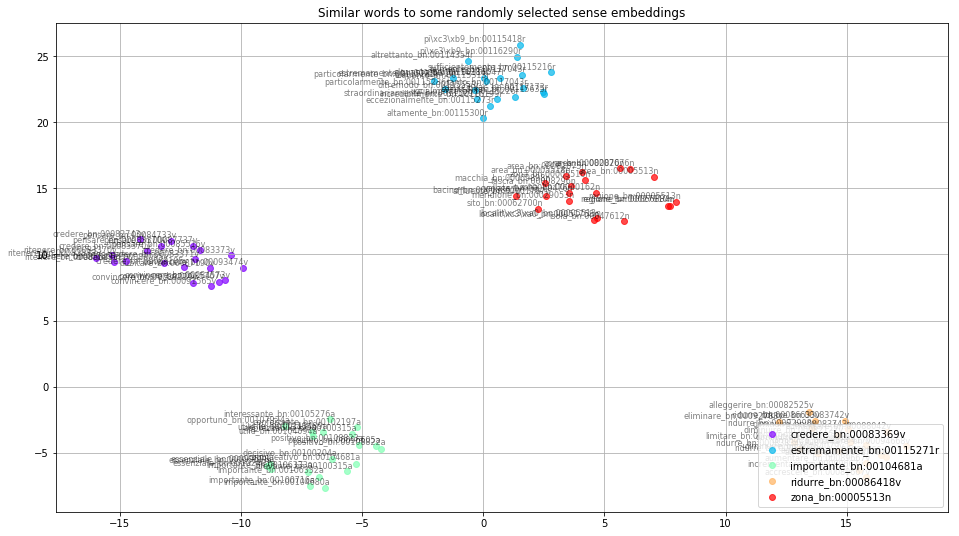

In [31]:
tsne_similar_words_plot('Similar words to some randomly selected sense embeddings', keys, embeddings_en_2d, word_clusters, 0.7, 'similar_words.png')